# conv_window
## effect of CONV_WIDTH
###  "progressive" and "whole"

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2


import mglearn
#import t_Mod
from t_Mod import *
#from t_Mod.plots_t import *

In [2]:
#plt.rcParams['figure.figsize'] = (5,5)
#plt.rcParams['figure.dpi'] = 72
#plt.rcParams['axes.grid'] = True
#plt.rcParams['savefig.dpi'] = 200
#plt.rcParams['savefig.transparent'] = True
#plt.rcParams['font.family'] = 'Dejavu Sans'

#plt.rcParams

# all reset
#mpl.rcdefaults()
# restore after seaborn
#mpl.rcParams.update(mpl.rcParamsDefault)

#plt.style.available
#plt.style.use('default')

In [3]:
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] )
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
18.0
# 설정 되어있는 폰트 글꼴
['sans-serif']


In [4]:
df = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "constant0(del).csv") )
#df2 = pd.read_csv(
#    os.path.join(mglearn.datasets.DATA_PATH, "constant(val).csv") )
# 예제를 위해 몇개의 열만 선택합니다
#df = df[['IR', 'FlowHt', 'Const', 'Var', 'Base', 'MixS75','MixS50','MixS25']]
#df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
#df2 = df2[['IR', 'FlowHt', 'Sand','Ash']]
df['delIF'] = df['delFlow']/df['delIR']*-1

df['delIF']=df['delIF'].replace(np.nan, 0)
df = df[['IR', 'FlowHt', 'Sand','Ash','delIR' ]]

display(df.head())
#display(df2.head())

IR  FlowHt  Sand  Ash   delIR
0  1.0000  0.0000   1.0  0.0  0.0000
1  0.9995  0.1798   1.0  0.0 -0.0005
2  0.9985  0.5389   1.0  0.0 -0.0010
3  0.9970  1.0757   1.0  0.0 -0.0015
4  0.9950  1.7884   1.0  0.0 -0.0020

In [5]:
df.describe()
#print(df[58:116])


IR      FlowHt        Sand         Ash       delIR
count  464.000000  464.000000  464.000000  464.000000  464.000000
mean     0.719750   18.216106    0.562500    0.437500   -0.014250
std      0.250962   23.804094    0.292666    0.292666    0.008379
min      0.173500    0.000000    0.100000    0.000000   -0.028500
25%      0.527000    5.900000    0.362500    0.212500   -0.021500
50%      0.789750    8.882400    0.550000    0.450000   -0.014250
75%      0.947500   15.364700    0.787500    0.637500   -0.007000
max      1.000000   98.685300    1.000000    0.900000    0.000000

(1.041325, 0.0)

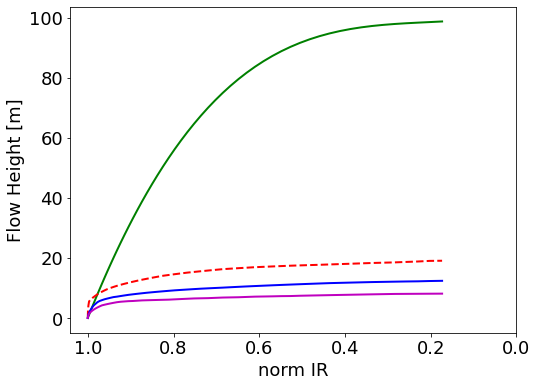

In [6]:

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-'
         , df.iloc[58:116,0], df.iloc[58:116,1],'r--'
         ,df.iloc[116:174,0], df.iloc[116:174,1],'b-'
         ,df.iloc[174:232,0], df.iloc[174:232,1], 'm-')
plt.xlabel('norm IR')
plt.ylabel('Flow Height [m]')
#plt.axis('equal')
#plt.axis('square')
plt.xlim([plt.xlim()[1], 0])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])

In [7]:
exper = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "exper.csv") )

display(exper.head())

c0_Q  c0_IR   c1_Q  c1_IR   c2_Q  c2_IR  c3_Q  c3_IR
0   0.00  1.000   0.00  1.000   0.00  1.000  0.00  1.000
1   2.90  0.974   2.81  1.000   2.89  0.993  2.69  0.987
2   5.80  0.973   5.62  0.998   5.71  0.971  5.24  0.937
3   8.66  0.959   8.35  0.972   8.34  0.903  6.96  0.629
4  11.52  0.962  10.98  0.936  10.19  0.636  7.92  0.354

In [8]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fig_con_03"
#IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "fig_con_03")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure expers


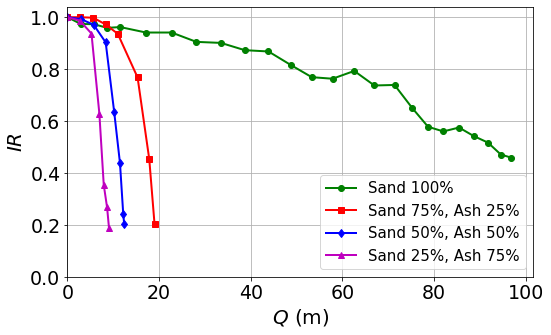

In [9]:
fig = plt.figure(figsize=(8,5))
plt.plot(exper.iloc[:,0], exper.iloc[:,1], 'go-', label='Sand 100%')
plt.plot(exper.iloc[:,2], exper.iloc[:,3], 'rs-', label='Sand 75%, Ash 25%')
plt.plot(exper.iloc[:,4], exper.iloc[:,5], 'bd-', label='Sand 50%, Ash 50%')
plt.plot(exper.iloc[:,6], exper.iloc[:,7], 'm^-', label='Sand 25%, Ash 75%')
plt.xlabel('$Q$ (m)', fontsize=20)
plt.ylabel('$IR$', fontsize=20)
plt.tick_params(labelsize=19)

#plt.axis('equal')
#plt.axis('square')
plt.xlim([0,plt.xlim()[1] ])
plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([1, 0], [0, 1])
plt.legend(fontsize=15)
plt.grid(True)

#,transparent = True
save_fig("expers")
#plt.savefig("fig_con_03/expers.png",transparent = True, dpi=300)
#plt.savefig("fig_con_02/normcurves.svg", dpi=300)
#plt.savefig("fig_con_02/normcurves.eps", dpi=300)

In [10]:
# ## 데이터 정규화

num_features = df.shape[1]
num_features

5

In [11]:
#df['FlowHt']=(df['FlowHt']-df['FlowHt'].mean())/df['FlowHt'].std()


df.describe()

IR      FlowHt        Sand         Ash       delIR
count  464.000000  464.000000  464.000000  464.000000  464.000000
mean     0.719750   18.216106    0.562500    0.437500   -0.014250
std      0.250962   23.804094    0.292666    0.292666    0.008379
min      0.173500    0.000000    0.100000    0.000000   -0.028500
25%      0.527000    5.900000    0.362500    0.212500   -0.021500
50%      0.789750    8.882400    0.550000    0.450000   -0.014250
75%      0.947500   15.364700    0.787500    0.637500   -0.007000
max      1.000000   98.685300    1.000000    0.900000    0.000000

IR        FlowHt          Sand           Ash         delIR
count  4.640000e+02  4.640000e+02  4.640000e+02  4.640000e+02  4.640000e+02
mean   8.958351e-16  5.206563e-16  1.025999e-15 -4.594026e-17 -1.171477e-15
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -2.176627e+00 -7.652509e-01 -1.580300e+00 -1.494878e+00 -1.700605e+00
25%   -7.680453e-01 -5.173944e-01 -6.833730e-01 -7.687946e-01 -8.652203e-01
50%    2.789270e-01 -3.921051e-01 -4.271081e-02  4.271081e-02 -1.242062e-15
75%    9.075088e-01 -1.197864e-01  7.687946e-01  6.833730e-01  8.652203e-01
max    1.116704e+00  3.380477e+00  1.494878e+00  1.580300e+00  1.700605e+00

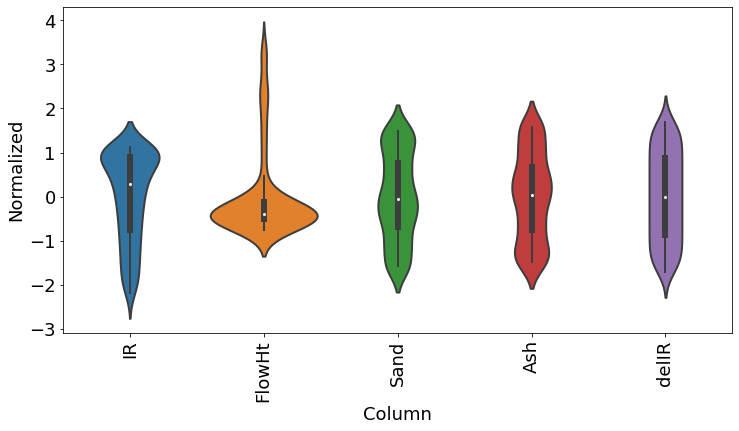

In [12]:
df_mean = df.mean()
df_std = df.std()
df_std_s = (df - df_mean) / df_std
df_std_m = df_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std_m)
_ = ax.set_xticklabels(df.keys(), rotation=90)
df_std_s.describe()

In [13]:
#sns.set()
#sns.set(font_scale=2.2)
#sns.set_style("whitegrid")  # set name of parameter set
#sns.set_style("ticks", {"xtick.major.size":18,
#                        "ytick.major.size":18})


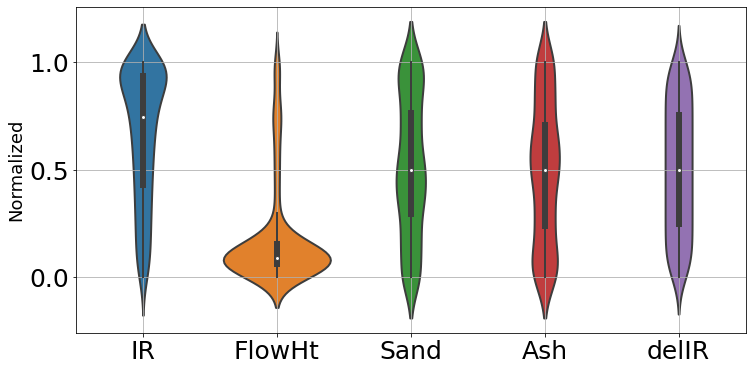

In [14]:
df_min = df.min()
df_max = df.max()
df_std_01 = (df - df_min) / (df_max-df_min)
df_std_m01 = df_std_01.melt(var_name='Column', value_name='Normalized')

fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.violinplot(x='Column', y='Normalized', data=df_std_m01)
_ = ax.set_xticklabels(df.keys(), rotation=0)
#df_std_s.describe()
ax.set_xlabel("")
ax.grid(True)
ax.tick_params(labelsize=25)

plt.show()

fig.savefig("fig_con_02/viol.png", dpi=300)
#fig.savefig("fig_con_02/viol.svg", dpi=300)
#fig.savefig("fig_con_02/viol.eps", dpi=300)

In [15]:
#sns.set()
#sns.set_style("white")
#sns.set_style("ticks")
#plt.rcParams['font.family'] = 'Serif'
#plt.rcParams['font.size'] = 14
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] )
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
18.0
# 설정 되어있는 폰트 글꼴
['sans-serif']


In [16]:
# data
df_org = df
df = df_std_s
df = df_std_01

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)*0.5

curve_0 = df[0:int(n*0.25)].copy()
curve_1 = df[int(n*0.25):int(n*0.5)].copy()
curve_2 = df[int(n*0.5):int(n*0.75)].copy()
curve_3 = df[int(n*0.75):int(n)].copy()
curve_4 = df[int(n):].copy()
#train_df_s = train_df_s.reset_index(drop=True)

In [17]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df_std_01.describe()

IR  FlowHt    Sand     Ash   delIR
count 464.000 464.000 464.000 464.000 464.000
mean    0.661   0.185   0.514   0.486   0.500
std     0.304   0.241   0.325   0.325   0.294
min     0.000   0.000   0.000   0.000   0.000
25%     0.428   0.060   0.292   0.236   0.246
50%     0.746   0.090   0.500   0.500   0.500
75%     0.936   0.156   0.764   0.708   0.754
max     1.000   1.000   1.000   1.000   1.000

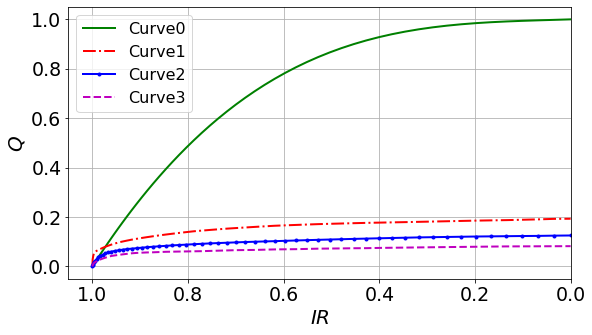

In [18]:
fig = plt.figure(figsize=(9,5))

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-', label='Curve0')
plt.plot(df.iloc[58:116,0], df.iloc[58:116,1],'r-.', label='Curve1')
plt.plot(df.iloc[116:174,0], df.iloc[116:174,1],'b.-', label='Curve2')
plt.plot(df.iloc[174:232,0], df.iloc[174:232,1], 'm--', label='Curve3')
plt.xlabel('$IR$', fontsize=20)
plt.ylabel('$Q$', fontsize=20)
#plt.axis('equal')
#plt.axis('square')
plt.xlim([plt.xlim()[1],0])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([1, 0], [0, 1])
plt.legend( fontsize=16)
plt.tick_params(labelsize=19)
plt.grid(True)

#,transparent = True

plt.savefig("fig_con_03/normcurves.png",transparent = True, dpi=300)
#plt.savefig("fig_con_02/normcurves.svg", dpi=300)
#plt.savefig("fig_con_02/normcurves.eps", dpi=300)


### for Publish
### curve_09 --- whole curve

In [19]:
crv_0 = curve_0.copy()
crv_0 = crv_0.reset_index(drop=True)
m1 = int(len(curve_0))
m = m1*1.0
train_df_09 = crv_0[0:int(m*0.8)]
val_df_09 = crv_0[int(m*0.8):int(m*1.0)]
test_df_09 = crv_0[int(m*0.8):int(m)]

In [20]:
crv_1 = curve_1.copy()
m1 = int(len(crv_1))
m = m1*1.0
train_df_19 = crv_1[0:int(m*0.8)]
val_df_19 = crv_1[int(m*0.8):int(m*1.0)]
test_df_19 = crv_1[int(m*0.8):int(m)]

In [21]:
crv_2 = curve_2.copy()
m1 = int(len(crv_2))
m = m1*1.0
train_df_29 = crv_2[0:int(m*1.0)]
val_df_29 = crv_2[int(m*0.):int(m*1.0)]
test_df_29 = crv_2[int(m*0.0):int(m)]

In [22]:
crv_3 = curve_3.copy()
m1 = int(len(crv_3))
m = m1*1.0
train_df_39 = crv_3[0:int(m*0.8)]
val_df_39 = crv_3[int(m*0.8):int(m*1.0)]
test_df_39 = crv_3[int(m*0.8):int(m)]



#### plot_curves

<ipython-input-23-cc6628475f98>:32: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axes.legend([l1,l2], labels=labels,fontsize=18, loc=4)
<ipython-input-23-cc6628475f98>:32: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axes.legend([l1,l2], labels=labels,fontsize=18, loc=4)
<ipython-input-23-cc6628475f98>:34: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax3.legend([l3], labels=labels,fontsize=18, loc=4)
<ipython-input-23-cc6628475f98>:32: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axes.legend([l1,l2], labels=labels,fontsize=18, loc=4)


Saving figure datacurve


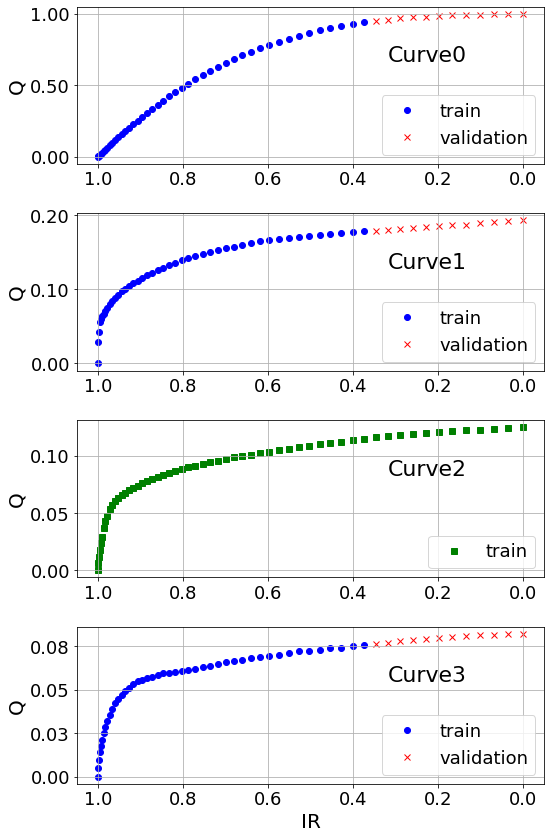

In [23]:
fig, ([ax1, ax2, ax3, ax4]) = plt.subplots(4,1, figsize=(8, 12), tight_layout = True)

for i, axes in enumerate ([ax1, ax2, ax3, ax4]) :
    if i==0 :
        trg = train_df_09
        valg = val_df_09
        teg  = test_df_09
    if i==1 :
        trg = train_df_19
        valg = val_df_19
        teg  = test_df_19
    if i==2 :
        trg = train_df_29
        valg = val_df_29
        teg  = test_df_29
    if i==3 :
        trg = train_df_39
        valg = val_df_39
        teg  = test_df_39

    if i!= 2 :
        l1 = axes.plot(trg['IR'], trg['FlowHt'], 'bo',   zorder=1)
        l2 = axes.plot(valg['IR'], valg['FlowHt'], 'rx',    zorder=1)
    if i==2 :
        l3 = axes.plot(teg['IR'], teg['FlowHt'], 'gs',  zorder=1)

    if i==3 : axes.set_xlabel('IR', fontsize=20)
    axes.set_ylabel('Q', fontsize=20)
    #plt.xlim([plt.xlim()[1], plt.xlim()[0]])
    labels = ["train", "validation", "test"]
    if i!= 2 :
        axes.legend([l1,l2], labels=labels,fontsize=18, loc=4)
    if i==2 :
        ax3.legend([l3], labels=labels,fontsize=18, loc=4)

    axes.invert_xaxis()
   # plt.gca().invert_yaxis()
    axes.text(0.75,0.65, "Curve"+str(i), ha="center", fontsize=22, transform=axes.transAxes)
    axes.grid(True)
    axes.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

#from t_Mod.plots_t import plot_curve, eval, add_curve # absolute path, import 함수

save_fig("datacurve")

## stepped for three parts of curve Data


### curve_0

In [24]:
crv_0 = curve_0.copy()
crv_0 = crv_0.reset_index(drop=True)

In [25]:
#m1 = int(n*0.2)
m1 = int(len(curve_0))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_0 = crv_0[0:int(m*0.8)]
    val_df_0 = crv_0[int(m*0.8):int(m)]
#    test_df_0 = crv_0[int(m*0.8):int(m)]
#    test_df_0 = crv_0[int(n*0.25*0.2*i-3):int(n*0.25*0.2*(i+1))]
    exec(f'train_df_0{i-1} = train_df_0')
    exec(f'val_df_0{i-1} = val_df_0')
#    exec(f'test_df_0{i-1} = test_df_0')


In [26]:
#train_total = {0: train_df_00 , 1: train_df_01, 2: train_df_02, 3: train_df_03}
#val_total = {0: val_df_00 , 1: val_df_01, 2: val_df_02, 3: val_df_03}
#test_total = {0: test_df_00 , 1: test_df_01, 2: test_df_02, 3: test_df_03}

train_total = [train_df_00, train_df_01, train_df_02]
val_total = [val_df_00, val_df_01, val_df_02]
#test_total = [test_df_00, test_df_01, test_df_02]

#ttt = { 'tr' : train_total, 'va' : val_total, 'te' : test_total}
ttt = { 'tr' : train_total, 'va' : val_total, 'te' : val_total}
ttt = pd.DataFrame(ttt)
print(ttt.columns)
print(ttt.index)

Index(['tr', 'va', 'te'], dtype='object')
RangeIndex(start=0, stop=3, step=1)


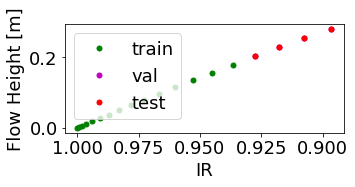

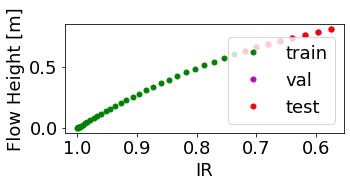

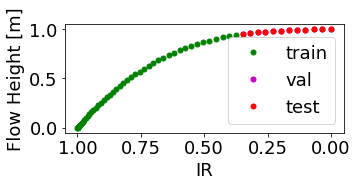

In [27]:
#from t_Mod.plots_t import plot_curve, eval, add_curve # absolute path, import 함수

for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt.iloc[i]['tr']
        va = ttt.iloc[i]['va']
        te = ttt.iloc[i]['te']
#        plot_curve(tr, va, te)
        plots_t.plot_curve(tr, va, te)
#        t_Mod.plots_t.plot_curve(tr, va, te)

### ---- function plot_curve


In [28]:
from matplotlib.ticker import MaxNLocator

def plot_crvs(fset) :
    #fig = plt.figure(figsize=(9,2))
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(9,2), tight_layout = True)
    #fig, ax = plt.subplots(nrows, ncols=1, figsize = (12,fvsize), tight_layout = True)

    for i, set in enumerate(fset[0:3]) :

        tr = set[0]
        va = set[1]
        if fset[3] != '2' :
            axes[i].plot(tr['IR'], tr['FlowHt'], 'o', label='train', markersize=2, c='tab:blue', alpha=0.8 )
            axes[i].plot(va['IR'], va['FlowHt'], 'o', label='val', markersize=2.5, c='tab:red', alpha=0.8 )
        else :
            axes[i].plot(tr['IR'], tr['FlowHt'], 'o', label='test', markersize=2, c='tab:green', alpha=0.8 )

        axes[i].set_xlabel('IR')
        axes[0].set_ylabel('Q')
        axes[i].set_xlim([plt.xlim()[1], plt.xlim()[0]])
        #axes[i].set_ylim([plt.ylim()[0], plt.ylim()[1]])
        axes[0].legend(loc='best')
        #axes[i].invert_xaxis()
        axes[i].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        axes[i].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        axes[i].yaxis.set_major_locator(MaxNLocator(5))
        axes[0].text(0.8,0.1, "Curve"+fset[3], ha="center", transform=axes[0].transAxes)
        #axes[0].margins(0.2)
        if fset[3]=='2' : break

    return (axes)


(0.0, 1.05)

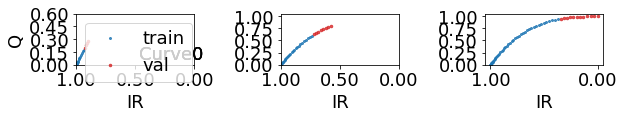

In [29]:
fset = ( [train_df_00, val_df_00],[train_df_01, val_df_01],[train_df_02, val_df_02],'0')
axes = plot_crvs(fset)
axes[0].set_ylim(0,0.6)
axes[1].set_ylim(0,1.05)
axes[2].set_ylim(0,1.05)


### curve_1

In [30]:
crv_1 = curve_1.copy()
#crv_1 = crv_1.reset_index(drop=True)

In [31]:
m1 = int(len(curve_1))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_1 = crv_1[0:int(m*0.8)]
    val_df_1 = crv_1[int(m*0.8):int(m)]
    exec(f'train_df_1{i-1} = train_df_1')
    exec(f'val_df_1{i-1} = val_df_1')

In [32]:
train_t_1 = {0: train_df_10 , 1: train_df_11, 2: train_df_12 }
val_t_1 = {0: val_df_10 , 1: val_df_11, 2: val_df_12 }
#test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_1 = { 'tr' : train_t_1, 'va' : val_t_1, 'te' : val_t_1}
ttt_1 = pd.DataFrame(ttt_1)

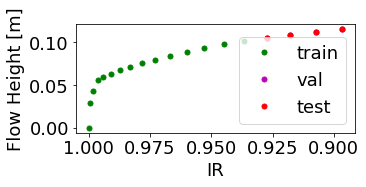

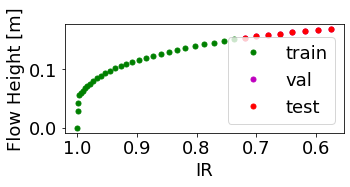

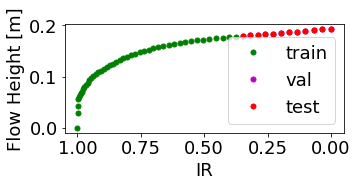

In [33]:
for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_1.iloc[i]['tr']
        va = ttt_1.iloc[i]['va']
        te = ttt_1.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)

(0.0, 0.3)

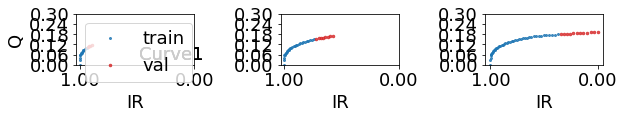

In [34]:
fset = ([train_df_10, val_df_10],[train_df_11, val_df_11],[train_df_12, val_df_12],'1')
axes = plot_crvs(fset)
axes[0].set_ylim(0,0.3)
axes[0].set_xlim(1.03,0)
axes[1].set_ylim(0,0.3)
axes[1].set_xlim(1.03,0)
axes[2].set_ylim(0,0.3)

### curve_2

In [35]:
crv_2 = curve_2.copy()
m1 = int(len(crv_2))
m = m1*1.0
train_df_20 = crv_2[0:int(m*1.0)]
val_df_20 = crv_2[int(m*0):int(m*1.0)]
test_df_20 = crv_2[int(m*0.0):int(m)]

for i in range(2, 4):
    m = m1*0.33334*i
    train_df_2 = crv_2[0:int(m*1.0)]
    val_df_2 = crv_2[int(m*0.0):int(m*1.0)]
    test_df_2 = crv_2[int(m*0.0):int(m)]
    exec(f'train_df_2{i-1} = train_df_2')
    exec(f'val_df_2{i-1} = val_df_2')
    exec(f'test_df_2{i-1} = test_df_2')
train_t_2 = {0: train_df_20 , 1: train_df_21, 2: train_df_22 }
val_t_2 = {0: val_df_20 , 1: val_df_21, 2: val_df_22 }
test_t_2 = {0: test_df_20 , 1: test_df_21, 2: test_df_22 }

ttt_2 = { 'tr' : train_t_2, 'va' : val_t_2, 'te' : test_t_2}
ttt_2 = pd.DataFrame(ttt_2)

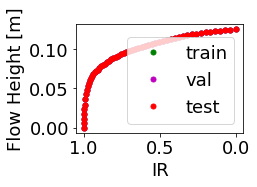

In [36]:
for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=(3, 2))
        tr = ttt_2.iloc[i]['tr']
        va = ttt_2.iloc[i]['va']
        te = ttt_2.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)#plt.gca().set_xlim(1.05, 0)
#plt.gca().set_ylim(0, 15)
#plt.savefig("fig_con_02/crv2.png", dpi=300)

(0.0, 0.2)

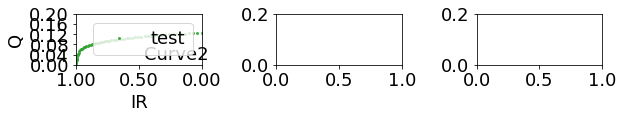

In [37]:
fset = ( [test_df_20, test_df_20],[test_df_21, test_df_21],[test_df_22, test_df_22], '2' )
axes = plot_crvs(fset)
axes[0].set_ylim(0,0.2)
axes[1].set_ylim(0,0.2)
axes[2].set_ylim(0,0.2)

### curve_3

In [38]:
crv_3 = curve_3.copy()
#crv_2 = crv_2.reset_index(drop=True)

In [39]:
m1 = int(len(curve_3))
for i in range(1, 4):
    m = m1*0.33334*i
    train_df_3 = crv_3[0:int(m*0.8)]
    val_df_3 = crv_3[int(m*0.8):int(m)]
    exec(f'train_df_3{i-1} = train_df_3')
    exec(f'val_df_3{i-1} = val_df_3')

In [40]:
train_t_3 = {0: train_df_30 , 1: train_df_31, 2: train_df_32 }
val_t_3 = {0: val_df_30 , 1: val_df_31, 2: val_df_32 }
#test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_3 = { 'tr' : train_t_3, 'va' : val_t_3, 'te' : val_t_3}
ttt_3 = pd.DataFrame(ttt_3)

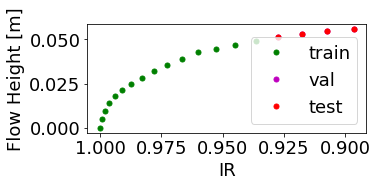

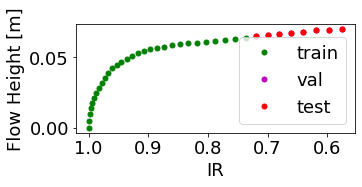

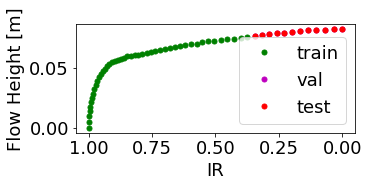

In [41]:
for i in range(0, 3) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_3.iloc[i]['tr']
        va = ttt_3.iloc[i]['va']
        te = ttt_3.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)

(0.0, 0.2)

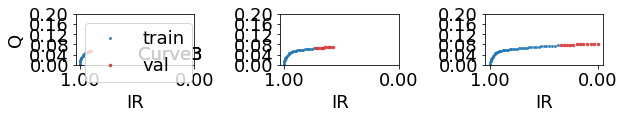

In [42]:
fset = ([train_df_30, val_df_30],[train_df_31, val_df_31],[train_df_32, val_df_32],'3')
axes = plot_crvs(fset)
axes[0].set_ylim(0,0.2)
axes[0].set_xlim(1.03,0)
axes[1].set_ylim(0,0.2)
axes[1].set_xlim(1.03,0)
axes[2].set_ylim(0,0.2)


# functions

In [43]:
def fit_3(model, window,   patience=2, EPOCHS=None):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
    history = model.fit(window.train, epochs=EPOCHS,
                      validation_data=window.val, verbose=0
                     , callbacks=[early_stopping])
    return history



In [44]:
def plot_xy1(model=None, window=None, window_t=None, dset_name=None, plot_col='FlowHt', max_subplots=40,
             n_batch=None, figures=None):
  if dset_name is not None :
      if dset_name == 'train':
            dataset = window_t.train
      elif dset_name == 'val':
            dataset = window_t.val
      elif dset_name == 'test' :
            dataset = window_t.test
#      else :
#            dataset = self.train

  if model is not None :
        fig, ax2 = plt.subplots(figsize =(4,2))
        ax2.margins(0.01)

  fig, ax3 = plt.subplots(figsize =(3,3))
  ax3.margins(0.01)

  markers = ["o", "s", "D", "h"]
  colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

  if dset_name is not None :
      data = [dataset]
  else :
      data = [window_t.train ]
  for j, dataset in enumerate(data) :
      for i, batch in enumerate(dataset) :
            inputs, labels, lab = batch
#            nrows = len(inputs)
#            if nrows == 1 :nrows=2
            if  j == 0 and i == 0 :
              x_max_0 = np.array([tf.reduce_max(labels)])
              x_min_0 = np.array([tf.reduce_min(labels)])

            x_max_tmp = np.array([tf.reduce_max(labels)])
            x_min_tmp = np.array([tf.reduce_min(labels)])
            if x_max_0 <= x_max_tmp:
                x_max = x_max_tmp
                x_max_0 = x_max_tmp
            if x_min_0 >= x_min_tmp:
                x_min = x_min_tmp
                x_min_0 = x_min_tmp

            if model is not None:
                batnum = len(inputs)
                predictions = model(inputs)

                predict0 = predictions.numpy()
                predict1 =  np.concatenate((predict0.T), axis=0)

                predict = np.zeros([batnum+7, batnum]) #batch+window-shift, batch
                for ii in range(batnum) :
                    predict[ii:8+ii, ii] = predict1[0:, ii]

                avg_pred = np.true_divide(predict.sum(1),(predict!=0).sum(1))
                avg_pred = tf.convert_to_tensor(avg_pred, dtype=tf.float32)
                #ax2.scatter(inputs[:,0,0],avg_pred[:batnum],marker='o',label='Predictions', c='#2ca02c', s=64)

           # lt = window_t.train_df
           # lt_num = lt.to_numpy()
           # for i1 in range(max_n+7) :
           #     ax2.scatter(lt_num[i1, 0],avg_pred[i1],marker='o',label='Predictions', c='#2ca02c', s=64)
            #            fvsize = nrows * 1.5
            plot_col_index = window_t.column_indices[plot_col]
            max_n = min(max_subplots, len(inputs))
            ax2.scatter(inputs[:, :, 0], inputs[:, :, plot_col_index],label='Inputs', marker='.',
                        color=colors[j],  facecolors='none')

            for n in range(max_n):
                if window_t.label_columns:
                        label_col_index = window_t.label_columns_indices.get(plot_col, None)
                else:
                        label_col_index = plot_col_index
                if label_col_index is None:
                        continue
                if model is not None:
                    if n == 0 and i == 0 :
                        #ax2.scatter(lab[n, :-1, 0], predictions[n, :-1, 0],marker='o',label='Predictions', c='#ff7f0e', s=32)
                        #ax3.scatter(predictions[n, :-1, 0], labels[n, :-1, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                        pass
                    if n == max_n-1 and i == len(dataset)-1 :
                        #ax2.scatter(lab[n, 1:, 0], predictions[n, 1:, 0],marker='X', label='Predictions',c='#2ca02c',    s=64)
                        pass
                    #ax3.scatter(predictions[n, 0, 0], labels[n, 0, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                    #ax3.scatter(predictions[n, 7, 0], labels[n, 7, label_col_index],color = colors[j],  facecolors='none', marker = '.')

                    l_max = np.array([tf.reduce_max(labels)])
                    p_max = np.array([tf.reduce_max(predictions)])
                    x_max_tmp = max(l_max, p_max)
                    l_min = np.array([tf.reduce_min(labels)])
                    p_min = np.array([tf.reduce_min(predictions)])
                    x_min_tmp = max(l_min, p_min)
                    if x_max_0 < x_max_tmp :
                        x_max = x_max_tmp
                        x_max_0 = x_max_tmp
                    if x_min_0 > x_min_tmp :
                        x_min = x_min_tmp
                        x_min_0 = x_min_tmp
            #ax2.scatter(lab[:, 0, 0], predictions[:, 0, 0],marker='x', label='Predictions', c='#ff7f0e', s=64)
            if i == 0 :
                ax2.scatter(lab[0, 0:7, 0], predictions[0, 0:7, 0],marker='o', label='Predictions',c='#ff7f0e', s=32)
            ax2.scatter(lab[:, 7, 0], predictions[:, 7, 0],marker='o', label='Predictions',c='#ff7f0e', s=32)
            #ax2.scatter(lab[:, :, 0], predictions[:, :, 0],marker='.', label='Predictions',c='#ff7f0e', s=32)
            ax3.scatter(predictions[:, :, 0], labels[:, :, label_col_index],color = colors[j],  facecolors='none', marker = '.')
            #if i == len(dataset)-1  :
            #    ax2.scatter(lab[n, 0:, 0], predictions[n, 0:, 0],
            #            marker='x', label='Predictions', c='#ff7f0e', s=64)

            if n_batch is not None :
                if n_batch <= i :
                    break
                else:
                    continue
            else :
                continue
            x_max_0 = x_max.copy()
            x_min_0 = x_min.copy()
      #ax2.scatter(lab[-1:, 1:, 0], predictions[-1:, 0:7, 0],marker='x', label='Predictions', c='#ff7f0e', s=64)
      #ax2.scatter(lab[-1:, -1:, 0], predictions[-1:, 7, 0],marker='s', label='Predictions', c='#ff7f0e', s=64)
      #ax2.scatter(lab[-1:, 1, 0], predictions[-1:, 0, 0],marker='s', label='Predictions', c='#ff7f0e', s=64)
  if model is not None:
        y_min = tf.identity(x_min)
        y_max = tf.identity(x_max)
#        ax3.set_xlim(x_min, x_max)
#        ax3.set_ylim(y_min, y_max)
        ax3.plot([x_min, y_max], [x_min, y_max], 'k--') # dashed diagonal
        ax3.set_xlabel('Predicted')
        ax3.set_ylabel('Measured')
  ax2.invert_xaxis()
#  ax4.invert_xaxis()

  return(ax2, ax3)

In [45]:
#--------------------------------------

# convolution
def plot_val_con( model=None,
             window_t=None, key=1, plot_col='FlowHt', max_subplots=40, n_batch=None):

     font = { 'family': 'serif', 'color' : 'black', 'weight': 'normal', 'size'  :  14}
     fig = plt.figure(figsize =(8,14))
     markers = ["o", "s", "D", "h"]
     colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

     # key=1 for progressive training
     if key == 1 :
            crvs = ( [train_df_12, val_df_12],
                     [train_df_02, val_df_02],
                    [train_df_32, val_df_32],
                    [test_df_22, test_df_22])
     else:  # key=0 for whole curve
            crvs = ([train_df_19, val_df_19],
                    [train_df_09, val_df_09],
                     [train_df_39, val_df_39],
                    [test_df_29, test_df_29])

     for jj, crv in enumerate(crvs) :
        window_t.train_df = crv[0]
        window_t.val_df = crv[1]
        dataset = [window_t.train, window_t.val]
        if jj==3 :
            window_t.test_df = crv[1]
            dataset = [window_t.test]

        ax = fig.add_subplot(4,1,jj+1)

        for j, ds in enumerate(dataset):

              for i, batch in enumerate(ds) :
                    inputs, labels, lab = batch
                    if  j == 0 and i == 0 :
                        x_max_0 = np.array([tf.reduce_max(labels)])
                        x_min_0 = np.array([tf.reduce_min(labels)])

                    x_max_tmp = np.array([tf.reduce_max(labels)])
                    x_min_tmp = np.array([tf.reduce_min(labels)])
                    if x_max_0 <= x_max_tmp:
                        x_max = x_max_tmp
                        x_max_0 = x_max_tmp
                    if x_min_0 >= x_min_tmp:
                        x_min = x_min_tmp
                        x_min_0 = x_min_tmp

                    if model is not None:
                        predictions = model(inputs)

                    plot_col_index = window_t.column_indices[plot_col]
                    max_n = min(max_subplots, len(inputs))

                    if jj != 3 :   # to separate test data
                        ax.plot(inputs[1:, :, 0], inputs[1:, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color=colors[j], zorder=-1)
                        if (j == 0 and i==0) :  ax.plot(inputs[0, :, 0], inputs[0, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color= colors[j], zorder=-1, label='train input' )
                        if (j == 1 and i==0) :  ax.plot(inputs[0, :, 0], inputs[0, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color= colors[j], zorder=-1, label='val input' )
                        if (j == 2 and i==0) :  ax.plot(inputs[0, :, 0], inputs[0, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color= colors[j], zorder=-1, label='test input' )
                    if jj == 3 :   # to separate test data
                        ax.plot(inputs[1:, :, 0], inputs[1:, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color=colors[j], zorder=-1)
                        if (j == 0 and i==0) :  ax.plot(inputs[0, :, 0], inputs[0, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color= colors[j], zorder=-1, label='test input' )

                    for n in range(max_n):
                        if window_t.label_columns:
                            label_col_index = window_t.label_columns_indices.get(plot_col, None)
                        else:
                            label_col_index = plot_col_index
                        if  label_col_index is None:
                            continue
                        if model is not None:
                            l_max = np.array([tf.reduce_max(labels)])
                            p_max = np.array([tf.reduce_max(predictions)])
                            x_max_tmp = max(l_max, p_max)
                            l_min = np.array([tf.reduce_min(labels)])
                            p_min = np.array([tf.reduce_min(predictions)])
                            x_min_tmp = max(l_min, p_min)
                        if x_max_0 < x_max_tmp :
                            x_max = x_max_tmp
                            x_max_0 = x_max_tmp
                        if x_min_0 > x_min_tmp :
                            x_min = x_min_tmp
                            x_min_0 = x_min_tmp

                        if jj != 3 :   # to separate test data

                            ax.scatter(lab[n, :, 0], predictions[n, :, 0],marker='o',  color=colors[j],edgecolor='k',  alpha=0.7, s=32)                    #ax2.scatter(lab[:, :, 0], predictions[:, :, 0],marker='.', label='Predictions',c='#ff7f0e', s=32)
                            if (j==0 and i == 0 and n==0) :
                                ax.scatter(lab[0, :, 0], predictions[0, :, 0],marker='o',  color=colors[j],
                               edgecolor='k',  label='train predicted', alpha=0.7, s=32)
                                #plot_curve2(train_df_10, val_df_10)

                            if (j==1 and i == 0 and n==0) :
                                ax.scatter(lab[n, :, 0], predictions[n, :, 0],marker='o', color=colors[j],
                               edgecolor='k',  label='val predicted', alpha=0.7, s=32)
                                #plot_curve2(train_df_10, val_df_10)
                            if (j==2 and i == 0 and n==0) :
                                ax.scatter(lab[0, :, 0], predictions[0, :, 0],marker='o',  color=colors[j],
                               edgecolor='k',  label='test predicted', alpha=0.7, s=32)
                                #plot_curve2(val_df_10, val_df_10)

                        if jj == 3 :   # to separate test data
                            ax.scatter(lab[n, :, 0], predictions[n, :, 0],marker='o',  color='tab:green',
                                   edgecolor='k',  alpha=0.7, s=32)
                            if (i==0 and n == 0) : ax.scatter(lab[0, :, 0], predictions[0, :, 0],marker='o',
                                           color='tab:green',edgecolor='k',  label='test predicted', alpha=0.7, s=32)


                    if n_batch is not None :
                         if n_batch <= i :
                             break
                         else:
                             continue
                    else:
                         continue
                    x_max_0 = x_max.copy()
                    x_min_0 = x_min.copy()
              if model is not None:
                 y_min = tf.identity(x_min)
                 y_max = tf.identity(x_max)

              #ax.legend( fontsize=11)
              handles, labels = ax.get_legend_handles_labels()
              if jj== 3 : ax.legend(handles, labels, fontsize=16, loc=4)
              if jj== 0 : ax.legend(handles, labels, fontsize=16, loc=4)

              ax.set_ylabel('$Q$',fontsize=20)
              #if jj==3 : ax.set_xlabel('IR')
              if jj==3: ax.set_xlabel('$IR$',fontsize=20)
    #plt.gca().text(0.9,0.1, "train_df_{}0".format(j), fontdict =font, ha="center", transform=ax[n].transAxes)
              if jj == 0 : j2=1
              if jj == 1 : j2=0
              if jj == 2 : j2=3
              if jj == 3 : j2=2
              ax.set_title("curve"+str(j2))
              ax.invert_xaxis()
              ax.set_xlim(1.02, 0)
              ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

              ax.tick_params(axis='y', which='major', labelsize=17)
              plt.gcf().tight_layout()

#conv_model = tf.keras.models.load_model("conv01/c1_02k")

#plot_val_con(conv_model, conv_window_t)

In [46]:
#--------------------------------------
# convolution
# 2 by 2 figures for train+validation data --- train_df_tot

def plot_val3_con( model=None,
             window_t=None, key=1, plot_col='FlowHt', max_subplots=40, n_batch=None):

    font = { 'family': 'serif', 'color' : 'black', 'weight': 'normal', 'size'  :  14}
    fig = plt.figure(figsize =(12,6))
    #fig = plt.figure()
    markers = ["o", "s", "D", "h"]
    colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

     # key=1 for progressive training
    if key == 1 :
        crvs = ( [train_df_02, val_df_02],
                [train_df_12, val_df_12],
                [test_df_22, test_df_22],
                [train_df_32, val_df_32])
    else:  # key=0 for whole curve
        crvs = ( [train_df_09, val_df_09],
                [train_df_19, val_df_19],
                [test_df_29, test_df_29],
                 [train_df_39, val_df_39],
                )

    for jj, crv in enumerate(crvs) :
        #window_t.train_df = crv[0]
        #window_t.val_df = crv[1]
# train_df_total concatenate
        train_df_tot = pd.concat([crv[0], crv[1]], axis=0)
        window_t.train_df = train_df_tot

        dataset = [window_t.train]
        if jj==2 :
            window_t.test_df = crv[1]
            dataset = [window_t.test]

        ax = fig.add_subplot(2,2,jj+1)

        for j, ds in enumerate(dataset):

              for i, batch in enumerate(ds) :
                    inputs, labels, lab = batch
                    if  j == 0 and i == 0 :
                        x_max_0 = np.array([tf.reduce_max(labels)])
                        x_min_0 = np.array([tf.reduce_min(labels)])

                    x_max_tmp = np.array([tf.reduce_max(labels)])
                    x_min_tmp = np.array([tf.reduce_min(labels)])
                    if x_max_0 <= x_max_tmp:
                        x_max = x_max_tmp
                        x_max_0 = x_max_tmp
                    if x_min_0 >= x_min_tmp:
                        x_min = x_min_tmp
                        x_min_0 = x_min_tmp

                    if model is not None:
                        predictions = model(inputs)

                    plot_col_index = window_t.column_indices[plot_col]
                    max_n = min(max_subplots, len(inputs))

                    if jj != 3 :   # to separate test data
                        ax.plot(inputs[1:, :, 0], inputs[1:, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color=colors[j], zorder=-1)
                        if (j == 0 and i==0) :  ax.plot(inputs[0, :, 0], inputs[0, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color= colors[j], zorder=-1, label='train input' )
                        if (j == 1 and i==0) :  ax.plot(inputs[0, :, 0], inputs[0, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color= colors[j], zorder=-1, label='val input' )
                        if (j == 2 and i==0) :  ax.plot(inputs[0, :, 0], inputs[0, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color= colors[j], zorder=-1, label='test input' )
                    if jj == 3 :   # to separate test data
                        ax.plot(inputs[1:, :, 0], inputs[1:, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color=colors[j], zorder=-1)
                        if (j == 0 and i==0) :  ax.plot(inputs[0, :, 0], inputs[0, :, plot_col_index], marker = '.',
                            linestyle='-', linewidth=0.2, color= colors[j], zorder=-1, label='test input' )

                    for n in range(max_n):
                        if window_t.label_columns:
                            label_col_index = window_t.label_columns_indices.get(plot_col, None)
                        else:
                            label_col_index = plot_col_index
                        if  label_col_index is None:
                            continue
                        if model is not None:
                            l_max = np.array([tf.reduce_max(labels)])
                            p_max = np.array([tf.reduce_max(predictions)])
                            x_max_tmp = max(l_max, p_max)
                            l_min = np.array([tf.reduce_min(labels)])
                            p_min = np.array([tf.reduce_min(predictions)])
                            x_min_tmp = max(l_min, p_min)
                        if x_max_0 < x_max_tmp :
                            x_max = x_max_tmp
                            x_max_0 = x_max_tmp
                        if x_min_0 > x_min_tmp :
                            x_min = x_min_tmp
                            x_min_0 = x_min_tmp


                        if jj != 2 :   # to separate test data

                            ax.scatter(lab[n, :, 0], predictions[n, :, 0],marker='o',  color=colors[j+1],edgecolor='k',  alpha=0.7, s=32)                    #ax2.scatter(lab[:, :, 0], predictions[:, :, 0],marker='.', label='Predictions',c='#ff7f0e', s=32)
                            if (j==0 and i == 0 and n==0) :
                                ax.scatter(lab[0, :, 0], predictions[0, :, 0],marker='o',  color=colors[j+1],
                               edgecolor='k',  label='train predicted', alpha=0.7, s=32)
                                #plot_curve2(train_df_10, val_df_10)

                            if (j==1 and i == 0 and n==0) :
                                ax.scatter(lab[n, :, 0], predictions[n, :, 0],marker='o', color=colors[j+1],
                               edgecolor='k',  label='val predicted', alpha=0.7, s=32)
                                #plot_curve2(train_df_10, val_df_10)
                            if (j==2 and i == 0 and n==0) :
                                ax.scatter(lab[0, :, 0], predictions[0, :, 0],marker='o',  color=colors[j+1],
                               edgecolor='k',  label='test predicted', alpha=0.7, s=32)
                                #plot_curve2(val_df_10, val_df_10)

                        if jj == 2 :   # to separate test data
                            ax.scatter(lab[n, :, 0], predictions[n, :, 0],marker='o',  color='tab:green',
                                   edgecolor='k',  alpha=0.7, s=32)
                            if (i==0 and n == 0) : ax.scatter(lab[0, :, 0], predictions[0, :, 0],marker='o',
                                           color='tab:green',edgecolor='k',  label='test predicted', alpha=0.7, s=32)

                    if n_batch is not None :
                         if n_batch <= i :
                             break
                         else:
                             continue
                    else:
                         continue
                    x_max_0 = x_max.copy()
                    x_min_0 = x_min.copy()

              ax.legend(fontsize=8)
              if jj==0 or jj==2 : ax.set_ylabel('Q', fontsize=15)
              if jj > 1 : ax.set_xlabel('IR', fontsize=15)

              if model is not None:
                 y_min = tf.identity(x_min)
                 y_max = tf.identity(x_max)

    #plt.gca().text(0.9,0.1, "train_df_{}0".format(j), fontdict =font, ha="center", transform=ax[n].transAxes)
              #if jj == 0 : j2=1
              #if jj == 1 : j2=0
              #if jj == 2 : j2=3
              #if jj == 3 : j2=2
              #jj = j-1 # original order
              # ax.set_xticklabels (lab, fontsize =15)
              ax.tick_params (axis = 'x', labelsize = 15)
              ax.tick_params (axis = 'y', labelsize = 15)

              plt.gca().set_title("curve"+str(jj), fontsize=18)
    #plt.gca().set_ylim(-0.2, 0.9)
              ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
              plt.gcf().tight_layout()
        ax.invert_xaxis()

In [47]:
def batch_plot(curv0=None, curv=None, model=None, window_t=None, n_batch = 30) :

  markers = ["X","o", "s", "D", "h"]
  if curv0 is not None :
     crvs = curv0
     batch_one(crvs, model, window_t)

  if curv0 is None and curv is None :
     crvs = (  [train_df_00, val_df_00, '0'],[train_df_10, val_df_10, '1'],
                [train_df_20, test_df_20, '2'],
                [train_df_30, val_df_30, '3'],
               )
     batch_all(crvs, model, window_t )
  elif curv0 is None and curv is not None :
     crvs  = curv
     batch_all(crvs, model, window_t)

def batch_all(crvs, model, window_t) :
 for jj, crv in enumerate(crvs) :
    window_t.train_df = crv[0]
    window_t.val_df = crv[1]
    data = [window_t.train, window_t.val]
    if crv[2]=='2' : data = [window_t.val]
    bat_plt(data, crv, model, window_t )


def batch_one(crvs, model, window_t) :
    window_t.train_df = crvs[0]
    window_t.val_df = crvs[1]
    data = [window_t.train, window_t.val]
    bat_plt(data, crvs, model, window_t)

def bat_plt(data, crv, model, window_t) :
    colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']
    n_batch=30
    fig1, ax3 = plt.subplots(figsize =(7,5))
    ax3.margins(0.01)

    for j, dataset in enumerate(data) :

      for i, batch in enumerate(dataset) :
            fig2, ax5 = plt.subplots(figsize =(7,3.5))
            inputs, labels, lab = batch

            input_width = 3
            shift = 1
            label_width = 1
            total_window_size = input_width + shift
            input_slice = slice(0, input_width*len(inputs))
            input_indices = np.arange(total_window_size*len(inputs))[input_slice]
            label_start = total_window_size - label_width
            labels_slice = slice(label_start, input_width*len(inputs)+1, 3)
            label_indices = np.arange(total_window_size*len(inputs))[labels_slice]

            predictions = model(inputs)

            in3 = np.array(inputs, dtype=np.float32)
            #in3 = tf.convert_to_tensor(data, dtype=tf.float32)
            in3 = in3.reshape(3*len(inputs),5)
            in3 = tf.convert_to_tensor(in3, dtype=tf.float32)

            la3 = np.array(labels, dtype=np.float32)
            la3 = la3.reshape(1*len(inputs),1)
            la3 = tf.convert_to_tensor(la3, dtype=tf.float32)

            pr3 = np.array(predictions, dtype=np.float32)
            pr3 = pr3.reshape(1*len(inputs),1)
            pr3 = tf.convert_to_tensor(pr3, dtype=tf.float32)

          #  ax5.scatter(input_indices, inputs[:, :, 1],label='Inputs', marker='.',
            ax5.plot(input_indices[:], in3[:,1],label='Inputs', marker='.', color=colors[j], zorder=-10, markersize=10, linewidth=0.8 )
            if crv[2]=='2' :
                ax5.plot(input_indices[:], in3[:,1],label='Inputs', marker='.', color='tab:red', zorder=-10, markersize=10, linewidth=0.8 )

            ax5.scatter(label_indices[:], la3[:],label='Labels', marker='o',edgecolors='k', c='#2ca02c', s=50)
            #ax5.scatter(label_indices,   predictions[:, :, 0], label='Predictions',
            ax5.scatter(label_indices[::],   pr3[:], label='Predictions',marker='X',  edgecolors='k', c='#ff7f0e', s=50)

            #ax3.scatter(predictions[:, 0, 0], labels[:, 0, 0],
            if crv[2] == '2':
                ax3.scatter( labels[:, 0, 0],predictions[:, 0, 0], marker='.',color='tab:green', s=50)
            else:
                ax3.scatter( labels[:, 0, 0],predictions[:, 0, 0], marker='.',color=colors[j], s=50)

            if j==0 and i==0 and crv[2]!='2' :
                ax3.scatter(labels[0, 0, 0], predictions[0, 0, 0], label='training',marker='.',color=colors[j], s=80)
            if i==0 and j==0 and crv[2]=='2' :
                ax3.scatter(labels[0, 0, 0], predictions[0, 0, 0], label='testing',marker='.',color='tab:green', s=80)

            if j==1 and i==0 :
                ax3.scatter(labels[0, 0, 0],predictions[0, 0, 0], label='validating',
                        marker='.',color=colors[j], s=80)


            if i==0 : ax5.legend(fontsize=16)
            if i < 3 and j==0 :
                #ax5.set_ylim(-0.001,0.1)
                ax5.text(0.9, 0.1,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)
            else:
                #ax5.set_ylim(-0.001,0.1)
                ax5.text(0.9, 0.1,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)

            if j==0 and i==0 :
                ax3.legend(fontsize=16)
            if j==1 and i==0:
                ax3.legend(fontsize=16)
            #i1 = i+1
            if i==0 and j==0 : ax5.set_title('Curve'+crv[2]+ ': Training')
            if i==0 and j==0 and crv[2]=='2' : ax5.set_title('Curve'+crv[2]+ ': Testing')
            if i==0 and j==1 : ax5.set_title('Curve'+ crv[2]+': Validation')
            if j==1 and i==0: ax5.set_xlabel('Input Index', fontsize=20)
            ax5.set_ylabel('$Q$', fontsize=20)
            #ax5.set_xlim(-2,140)
            #if i == len(list(dataset))-1 : ax5.set_xlim(-2,80)

            #fig2.savefig("fig_con_02/bc1"+str(j)+str(i)+".png", dpi=300)
            ax5.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

            fig2.tight_layout()

            #fig2.savefig("fig_con_03/batch0"+str(j)+str(i)+".png", dpi=300)
            save_fig("batch0"+str(j)+str(i))

            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue


    if crv[2] == '0' :
        ax3.plot([0, 1.02], [0, 1.02], 'k--') # dashed diagonal
        ax3.set_xlim(0,1.02)
        ax3.set_ylim(0,1.02)
    else :
        ax3.plot([0, 0.5], [0, 0.5], 'k--') # dashed diagonal
        ax3.set_xlim(0,0.5)
        ax3.set_ylim(0,0.5)
#ax5.invert_xaxis()
    ax3.text(0.8, 0.2,  "Curve"+crv[2], size=20, ha="center", transform=ax3.transAxes)
    ax3.set_ylabel('Predicted Q', fontsize=20)
    ax3.set_xlabel('Label Q', fontsize=20)
    ax3.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    fig1.tight_layout()


    fig1.savefig("fig_con_03/batch2.png", dpi=300)
#plt.gca().set_xlim(-1,80)

 #   subplot_title = ('Validation')
#plt.gca().set_title(subplot_title)

#batch_plot(curv0 =  [train_df_09, val_df_09, '0'], model=conv_model, window_t=conv_window_t )
#batch_plot(curv =  ([train_df_00, val_df_00, '0'],  [train_df_10, val_df_10, '1'] ))
#batch_plot(curv = None, model=conv_model, window_t=conv_window_t)
#batch_plot(curv0 = [train_df_00, val_df_00, '0'] )

#batch_plot( curv = ([train_df_00, val_df_00, '0'],  [train_df_10, val_df_10, '1'] ))

# Convolution Model

In [48]:
def get_uncompiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])
    return model

def get_compiled_model():
  model = get_uncompiled_model()
  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])
  return model

In [49]:
MAX_EPOCHS=100

early_stopping = tf.keras.callbacks.EarlyStopping\
    (monitor='val_loss', patience=2, mode='min')

def fit_model(model=None, window=None, epochs_num=MAX_EPOCHS, verb=None, stop=early_stopping ):
    history = model.fit(window.train, epochs=epochs_num, validation_data=window.val,
              verbose=verb, callbacks=[stop])
#              verbose=verb, callbacks=[early_stopping])
    #IPython.display.clear_output()
    print('loss : ', history.history['loss'][-1:])
    print('val_loss : ', history.history['val_loss'][-1:])
    print('mae : ', history.history['mean_absolute_error'][-1:])
    print('val_mae : ', history.history['val_mean_absolute_error'][-1:])

    return history

In [50]:
CONV_WIDTH = 3

conv3_model = get_compiled_model()

In [51]:
#plot_val3_con(conv3_model, conv3_window_t)

In [52]:
CONV_WIDTH = 5

conv5_model = get_compiled_model()

In [53]:
#plot_val3_con(conv5_model, conv5_window_t)


#### WindowGrerator Class
#### WinGen()

In [54]:
# WindowGen needs train_df
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
train_df = train_df_01.copy()
val_df = val_df_01.copy()
test_df = val_df_01.copy()


In [55]:
CONV_WIDTH = 3
conv3_window = Class_t.WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv3_window

conv3_window_t = Class_t.WinGen(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv3_window_t

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['FlowHt']

In [56]:
CONV_WIDTH = 3
conv_window = Class_t.WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window

conv_window_t = Class_t.WinGen(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window_t

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['FlowHt']

In [57]:
CONV_WIDTH = 5
conv5_window = Class_t.WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv5_window

conv5_window_t = Class_t.WinGen(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv5_window_t

Total window size: 6
Input indices: [0 1 2 3 4]
Label indices: [5]
Label column name(s): ['FlowHt']

In [58]:
print("Conv3 model on `conv3_window`")
print('Input shape:', conv3_window.example[0].shape)
print('Labels shape:', conv3_window.example[1].shape)
print('Output shape:', conv3_model(conv3_window.example[0]).shape)

Conv3 model on `conv3_window`
Input shape: (16, 3, 5)
Labels shape: (16, 1, 1)
Output shape: (16, 1, 1)


In [59]:
print("Conv5 model on `conv5_window`")
print('Input shape:', conv5_window.example[0].shape)
print('Labels shape:', conv5_window.example[1].shape)
print('Output shape:', conv5_model(conv5_window.example[0]).shape)

Conv5 model on `conv5_window`
Input shape: (16, 5, 5)
Labels shape: (16, 1, 1)
Output shape: (16, 1, 1)


In [60]:
#IPython.display.clear_output()
#val_performance['Conv'] = conv_model24.evaluate(wide_conv_window24.val)
#performance['Conv'] = conv_model24.evaluate(wide_conv_window24.test, verbose=0)

In [61]:
CONV_WIDTH = 3

LABEL_WIDTH = 8
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = Class_t.WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [62]:
wide_conv_window_t = Class_t.WinGen(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window_t


Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [63]:
CONV_WIDTH = 3

LABEL_WIDTH = 8
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv3_window = Class_t.WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv3_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [64]:
wide_conv3_window_t = Class_t.WinGen(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv3_window_t

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [65]:
CONV_WIDTH = 3

LABEL_WIDTH = 5
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide5_conv3_window = Class_t.WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide5_conv3_window

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [3 4 5 6 7]
Label column name(s): ['FlowHt']

In [66]:
CONV_WIDTH = 3

wide5_conv3_window_t = Class_t.WinGen(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide5_conv3_window_t

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [3 4 5 6 7]
Label column name(s): ['FlowHt']

In [67]:
print("Conv3 model on `wide_conv3_window`")
print('Input shape:', wide_conv3_window.example[0].shape)
print('Labels shape:', wide_conv3_window.example[1].shape)
print('Output shape:', conv3_model(wide_conv3_window.example[0]).shape)

Conv3 model on `wide_conv3_window`
Input shape: (16, 10, 5)
Labels shape: (16, 8, 1)
Output shape: (16, 8, 1)


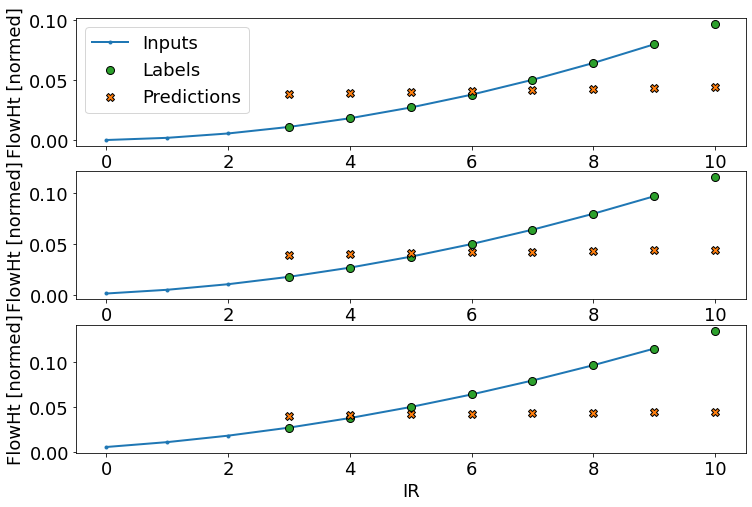

In [68]:
wide_conv3_window.plot(conv3_model)

In [69]:
CONV_WIDTH = 5

LABEL_WIDTH = 8
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv5_window = Class_t.WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv5_window

Total window size: 13
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [ 5  6  7  8  9 10 11 12]
Label column name(s): ['FlowHt']

In [70]:
wide_conv5_window_t = Class_t.WinGen(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv5_window_t

Total window size: 13
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [ 5  6  7  8  9 10 11 12]
Label column name(s): ['FlowHt']

In [71]:
print("Conv5 model on `wide_conv5_window`")
print('Input shape:', wide_conv5_window.example[0].shape)
print('Labels shape:', wide_conv5_window.example[1].shape)
print('Output shape:', conv5_model(wide_conv5_window.example[0]).shape)

Conv5 model on `wide_conv5_window`
Input shape: (16, 12, 5)
Labels shape: (16, 8, 1)
Output shape: (16, 8, 1)


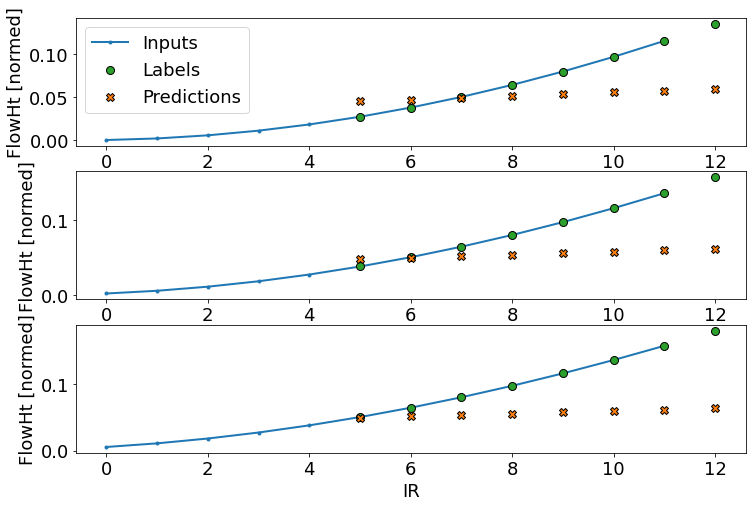

In [72]:
wide_conv5_window.plot(conv5_model)


## model and window information

In [73]:
print('conv3_window:','\n',conv3_window)
print('')
print('wide_conv3_window:','\n', wide_conv3_window)
print('')

print('Input shape:',  wide_conv3_window.example[0].shape)
print('Labels shape:',  wide_conv3_window.example[1].shape)
print('Output shape:',  conv3_model(wide_conv3_window.example[0]).shape)

conv3_window: 
 Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['FlowHt']

wide_conv3_window: 
 Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

Input shape: (16, 10, 5)
Labels shape: (16, 8, 1)
Output shape: (16, 8, 1)


In [74]:
#IPython.display.clear_output()
#val_performance['Conv'] = conv_model24.evaluate(wide_conv_window24.val)
#performance['Conv'] = conv_model24.evaluate(wide_conv_window24.test, verbose=0)

In [75]:
train_df_0_tot = crv_0
train_df_1_tot = crv_1
train_df_2_tot = crv_2
train_df_3_tot = crv_3

#### function add curves, eval

In [76]:
MAX_EPOCHS=100

early_stopping = tf.keras.callbacks.EarlyStopping\
    (monitor='val_loss', patience=100, mode='min')

def fit_model(model=None, window=None, epochs_num=MAX_EPOCHS, verb=None, stop=early_stopping ):
    history = model.fit(window.train, epochs=epochs_num, validation_data=window.val,
              verbose=verb, callbacks=[stop])
#              verbose=verb, callbacks=[early_stopping])
    #IPython.display.clear_output()
  #  print('loss : ', history.history['loss'][-1:])
  #  print('val_loss : ', history.history['val_loss'][-1:])
  #  print('mae : ', history.history['mean_absolute_error'][-1:])
  #  print('val_mae : ', history.history['val_mean_absolute_error'][-1:])

    return history

def add_curve(curve=None, window = None, window_t=None,
              model=None, npat= 2, num_epoch = 20, add_num=0,  df_name=None ) :

    train_loss = []
    val_loss = []
    train_mae = []
    val_mae = []

    #for i in range(0,(3-add_num)) :
    for i in range(0, 3):
        plots_t.MAX_EPOCHS = num_epoch + 10*i
#        MAX_EPOCHS = 20 + 10*i
        train_df = curve.iloc[i]['tr']
        val_df = curve.iloc[i]['va']
        #val_df = curve.iloc[i]['tr']
        test_df = curve.iloc[i]['te']

        #print(f'****** i =   {i}')

        window.train_df = train_df
        window.val_df = val_df
        window.test_df = test_df

        if i >= add_num :
            #history = fit_model(model, window, epochs_num=num_epoch, verb=0, stop=[])
            history = fit_model(model, window, epochs_num=num_epoch, verb=0 )

            train_loss += history.history['loss'][-1:]
            if 'val_loss' in history.history:
                print("val_loss not in the list")
                val_loss += history.history['val_loss'][-1:]

            train_mae += history.history['mean_absolute_error'][-1:]
            if 'val_mean_absolute_error' in history.history:
                print("val_mean_absolute_error not in the list")
                val_mae += history.history['val_mean_absolute_error'][-1:]

            if i==2 : eval(history.history)

            window_t.train_df = train_df
            window_t.val_df = val_df
            window_t.test_df = test_df

            #window_t.plot_batch(model, dset_name='train', n_batch=10 )
            #window_t.plot_xy(model, n_batch=30)

            #subplot_title = (df_name+str(i))
            #plt.gca().set_title(subplot_title)

            #plt.text(0.9, 0.1, "subtitle".format(subplot_title))
            #plt.gca().text(0.9, 0.1,  subplot_title)


    #    window_t.plot_batch(model, dset_name='val', n_batch=10, figures=0)

#    window_t.plot_batch(model, dset_name='test', n_batch=10, figures=0)

    train_loss = [x/4 for x in train_loss]
    val_loss = [x/4 for x in val_loss]
    train_mae = [x/4 for x in train_mae]
    val_mae = [x/4 for x in val_mae]

  #  return train_loss, val_loss, train_mae, val_mae
    return history.history


def eval(hist) :
 #   fig, loss_ax = plt.subplots(figsize =(5,3.5))
    fig, loss_ax = plt.subplots( figsize =(8,5))
    acc_ax = loss_ax.twinx()
    loss_ax.plot(hist['loss'], 'y', label='train loss')
    if 'val_loss' in hist:
        loss_ax.plot(hist['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist['mean_absolute_error'], 'b', label='train MAE')
    if 'val_mean_absolute_error' in hist:
        acc_ax.plot(hist['val_mean_absolute_error'], 'g', label='val MAE')

    loss_ax.set_xlabel('epoch', fontsize=20)
#    loss_ax.set_xlabel('epoch', fontsize=10)
    loss_ax.set_ylabel('loss', fontsize=20)
    acc_ax.set_ylabel('mean_absolute_error', fontsize=19)

    #acc_ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3e'))
    #loss_ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3e'))
    acc_ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    loss_ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    loss_ax.tick_params (axis = 'x', labelsize = 18)
    loss_ax.tick_params (axis = 'y', labelsize = 18)


    #loss_ax.legend(loc='best')
    loss_ax.legend(loc='upper left',fontsize=16)
    acc_ax.legend(loc='upper right',fontsize=16)
    #loss_ax.legend(loc='center')
    #acc_ax.legend(loc='lower center')
    plt.gcf().tight_layout()

In [77]:
"""
from keras.utils import plot_model

conv3_model.summary()
plot_model(conv3_model, to_file='model.png',
               show_shapes=True,
 #   show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96, )
"""

'\nfrom keras.utils import plot_model\n\nconv3_model.summary()\nplot_model(conv3_model, to_file=\'model.png\',\n               show_shapes=True,\n #   show_dtype=False,\n    show_layer_names=True,\n    rankdir="TB",\n    expand_nested=False,\n    dpi=96, )\n'

# Fitting
# Start
---------------------------------------------------------------------------------
### progressive and whole fitting

In [110]:
CONV_WIDTH = 3
conv3_model = get_compiled_model()

In [111]:
CONV_WIDTH = 3

conv3_model =  tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)])

conv3_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])



In [ ]:
conv3_window.train_df = train_df_19
conv3_window.val_df = val_df_19
conv3_window.test_df = test_df_19
#conv3_window_t.train_df = train_df_19
#conv3_window_t.val_df = val_df_19
#conv3_window_t.test_df = test_df_19

#history = fit_model(conv3_model, conv3_window, epochs_num=30, verb=0, stop=[])
history = fit_model(conv3_model, conv3_window, epochs_num=30, verb=0 )

eval(history.history)
plot_val3_con(conv3_model, conv3_window_t, key=0)

In [ ]:
from keras.utils import plot_model

conv3_model.summary()
plot_model(conv3_model, to_file='model.png',
               show_shapes=True,
 #   show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96, )

- fit 훈련한 모델들이 항상 같은 결과를 나타내지 않음. 초기 훈련된 모델에 대해서 추가 학습하는 경우에 전 단계
 결과와 유사한 추세로 수렴
- 동일한 조건에서 fit함에도 불구하고 수렴과정이 다른 것으로 의심., 어디에서 이런 현상이 발생하는지에 대한 검토가 요구됨.
- 어떤 결과를 보이는 모델일지라도 훈련이 끝난 모델이 임의 곡선을 잘 예측한다면
- predict에서 그 모델은 항상 같은 결과를 보여야 하고,만약 그렇다면 fit후 다른 결과를 보일지라도 문제가 없음.

In [ ]:
# 위 셀에서 얻은 모델을 다시 실행
plot_val3_con(conv3_model, conv3_window_t, key=0)


In [ ]:
conv3_window.train_df = train_df_19
conv3_window.val_df = val_df_19
conv3_window.test_df = test_df_19
conv3_window_t.train_df = train_df_19
conv3_window_t.val_df = val_df_19
conv3_window_t.test_df = test_df_19

#history = fit_model(conv3_model, conv3_window, epochs_num=30, verb=0, stop=[])
history = fit_model(conv3_model, conv3_window, epochs_num=30, verb=0 )

eval(history.history)
plot_val3_con(conv3_model, conv3_window_t, key=0)

In [ ]:
plot_val3_con(conv3_model, conv3_window_t, key=0)

### progressive training 에 대해서도 확인해 보자.

In [ ]:
CONV_WIDTH = 3
conv3_model = get_compiled_model()

In [ ]:
history = add_curve(curve=ttt_1, window= conv3_window,
            window_t=conv3_window_t, model=conv3_model, npat= 20,
                      num_epoch=30, add_num=0, df_name='temp')

plot_val3_con(conv3_model, conv3_window_t)

In [ ]:
history = add_curve(curve=ttt_1, window= conv3_window,
            window_t=conv3_window_t, model=conv3_model, npat= 20,
                      num_epoch=30, add_num=0, df_name='temp')

plot_val3_con(conv3_model, conv3_window_t)


In [ ]:
plot_val3_con(conv3_model, conv3_window_t)

#### CONV_WIDTH=5 에 대해서

In [ ]:
CONV_WIDTH = 5
conv5_model = get_compiled_model()

In [ ]:
conv5_window.train_df = train_df_19
conv5_window.val_df = val_df_19
conv5_window.test_df = test_df_19

history = fit_model(conv5_model, conv5_window, epochs_num=50, verb=0, stop=[])

eval(history.history)
plot_val3_con(conv5_model, conv5_window_t, key=0)

In [ ]:
CONV_WIDTH = 5
conv5_model = get_compiled_model()

In [ ]:
history = add_curve(curve=ttt_1, window= conv5_window,
            window_t=conv5_window_t, model=conv5_model, npat= 50,
                      num_epoch=50, add_num=0, df_name='temp')
IPython.display.clear_output()

plot_val3_con(conv5_model, conv5_window_t )

In [ ]:
history = add_curve(curve=ttt_1, window= conv5_window,
            window_t=conv5_window_t, model=conv5_model, npat= 50,
                      num_epoch=50, add_num=0, df_name='temp')
IPython.display.clear_output()

plot_val3_con(conv5_model, conv5_window_t )

-  convolution width를 3 에서 5 로 늘렸지만 결과는 크게 다르지 않음. 아직 확정된 결과는 아님.---
이 곡선에 대해서는 영향이 크지 않은 듯,  곡선부와 직선부가 혼재한 경우 넓은 윈도우에 대해서 훈련하는
것이 더 나은 결과를 줄 수 있지 않을까?
- 5 보다 더 넓게 벌릴 경우 어떻게 되는지 검토 필요. 원리를 생각해 보아야 할 듯..
##### wide window
- 훈련이 끝난 모델에 대해서 wide window 적용 가능, 모델을 wide window에 대해서 훈련 불필요.
- 결과는 다만 넓은 창에 대해서 동시에 predict를 얻을 수 있느 것으로 보인다.
- wide window 에 대해서 훈련을 다시 하는 경우에 어떻게 되나 ? 수렴에 도움이 되는지 확인 ..


In [ ]:
plot_val3_con(conv3_model, conv3_window_t )

plot_val3_con(conv3_model, wide_conv3_window_t )


In [ ]:
plot_val3_con(conv5_model, conv5_window_t )

plot_val3_con(conv5_model, wide_conv5_window_t )

- **wide window 에 대해서 훈련을 다시 하는 경우**
- 훈련이 끝난 모델에 대해서 wide window 적용 가능, 모델을 wide window에 대해서 훈련 불필요.
- 결과는 다만 넓은 창에 대해서 동시에 predict를 얻을 수 있는 것에 만족?  동일한 결과 나오는 것이 당연?
- wide window 에 대해서 훈련을 다시 하는 경우 : 결론 변화없어야.....
- 배치 수가 줄어들걸.. 배치 변화는 훈련 결과에 영향을 미칠 수 있으나 최종 결과는 동일 ?
- validation data 수가 적으므로 좁은 윈도우로 수정 검토

In [ ]:
CONV_WIDTH = 3
conv3w_model = get_compiled_model()

In [ ]:
wide_conv3_window.train_df = train_df_19
wide_conv3_window.val_df = val_df_19
wide_conv3_window.test_df = test_df_19
#history = fit_model(conv3_model, conv3_window, epochs_num=30, verb=0, stop=[])
history = fit_model(conv3w_model, wide_conv3_window, epochs_num=100, verb=0 )
IPython.display.clear_output()
eval(history.history)
plot_val3_con(conv3w_model, wide_conv3_window_t, key=0)

In [ ]:
wide5_conv3_window_t

In [ ]:
plot_val3_con(conv3w_model, conv3_window_t, key=0)

In [ ]:
wide5_conv3_window_t

In [ ]:
CONV_WIDTH = 3
conv5w_model = get_compiled_model()

In [ ]:
wide5_conv3_window_t.train_df = train_df_19
wide5_conv3_window_t.val_df = val_df_19
wide5_conv3_window_t.test_df = test_df_19
#history = fit_model(conv3_model, conv3_window, epochs_num=30, verb=0, stop=[])
history = fit_model(conv5w_model, wide5_conv3_window, epochs_num=50, verb=0 )
IPython.display.clear_output()
eval(history.history)
plot_val3_con(conv5w_model, wide5_conv3_window_t, key=0)

----------------------------------
## end of investigation about
- conv_width
- wide_conv_width
- progressive vs. whole

- tentative conclusions
    - Conv_width affect on the results
    - width of window just allow us to see wider step at once.
    - progressive looks a little bit of training converge but the effects looks mimic.
- Next step
    - Invest more about the effect of convolution width ---- should be effective
    - wider conv width, consider the variations of curve in a wider time steps.
    - The degree of affection depends on the shape of curves.
    - It is not revealed yet those effects for our curves.
    - To increase the conv. width, the steps of data needs to be adjusted. let's just try
    for the whole data first.

#### CONV_WIDTH=10 에 대해서

In [ ]:
CONV_WIDTH = 10
conv10_model = get_compiled_model()

In [ ]:
CONV_WIDTH = 10
conv10_window = Class_t.WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv10_window

conv10_window_t = Class_t.WinGen(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv10_window_t

In [ ]:
conv10_window.train_df = train_df_19
conv10_window.val_df = val_df_19
conv10_window.test_df = test_df_19

history = fit_model(conv10_model, conv10_window, epochs_num=50, verb=0, stop=[])

eval(history.history)
plot_val3_con(conv10_model, conv10_window_t, key=0)

In [ ]:
print("Conv10 model on `conv10_window`")
print('Input shape:', conv10_window.example[0].shape)
print('Labels shape:', conv10_window.example[1].shape)
print('Output shape:', conv10_model(conv10_window.example[0]).shape)

In [ ]:
conv10_window.plot(conv10_model)

In [ ]:
plot_val3_con(conv3_model, conv3_window_t, key=0)
plot_val3_con(conv5_model, conv5_window_t, key=0)

- For curves examined in this work, a convolution width may not affect seriously on
the trained model obtained.
- conclusion :
       - using CONV_WIDTH = 3 seems like good enough to train the curves.
       - Label Width = 1 is fine. The window width does not affect on training results.
         Just to see more steps with wider window.
       - INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1) : INPUT WIDTH is determined in WinGen
       - The program is written for Label Width=1, may be OK for other width, but
         need to check

       * Works for
            - the whole curves
            - CONV_WIDTH = 3, LABEL_WIDTH =1 : 21_flow_conv_pub01
         is fine to use for further investigatons.


--------
# Whole curve
   #### CONV_WIDTH = 3, LABEL_WIDTH =1


In [ ]:
conv_model = get_compiled_model()

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

conv_model.summary()

from keras.utils import plot_model
plot_model(conv_model, to_file='model.png',
               show_shapes=True,
 #   show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

# Start
# Curve 1 + other curves

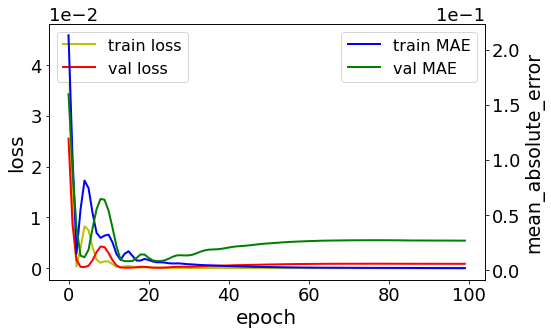

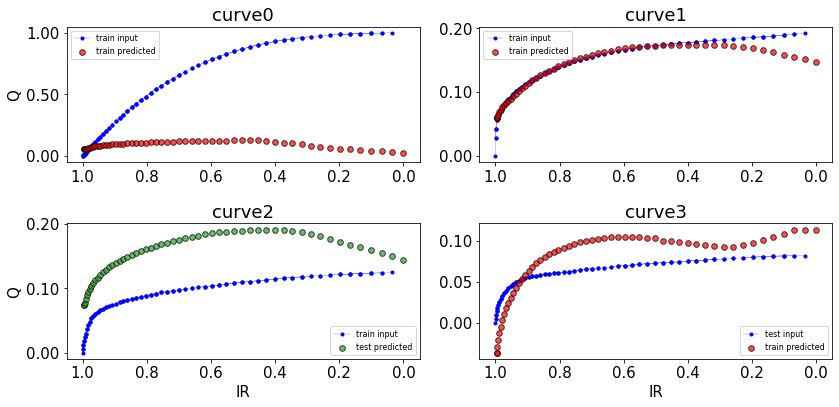

In [132]:
conv_model = get_compiled_model()

conv_window.train_df = train_df_19
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19

history = fit_model(conv_model, conv_window, epochs_num=100, verb=0)
#hist = fit_model(lstm_model, wide_window, epochs_num=10, verb=1, stop=[] )
#hist = fit_model(lstm_model, wide_window, epochs_num=100, verb=1, stop=[ cp_callback])
#IPython.display.clear_output()

eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)


In [133]:
conv_model.save("conv_03/c1")
np.save('conv_03/c1.npy', history.history)

INFO:tensorflow:Assets written to: conv_03/c1\assets


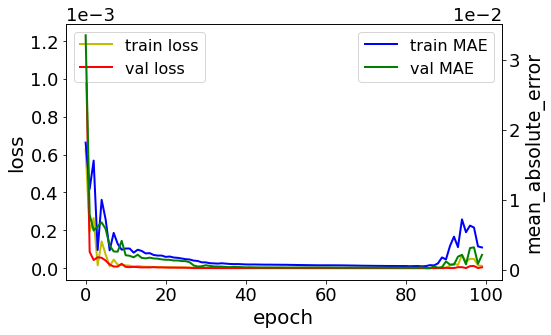

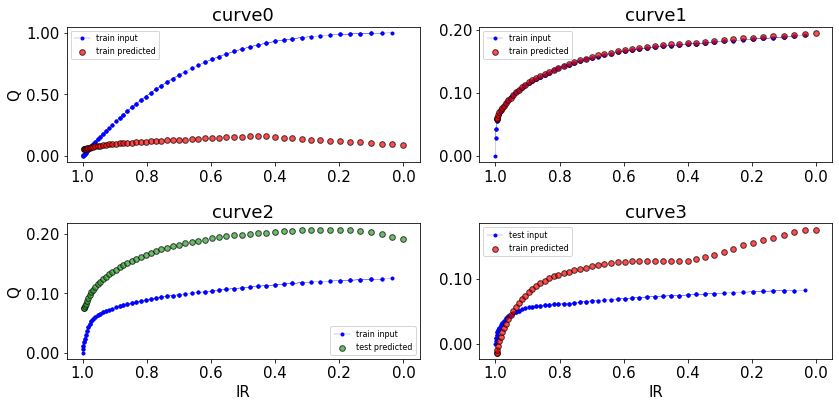

In [134]:
conv_model = tf.keras.models.load_model("conv_03/c1")

train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19

history = fit_model(conv_model, conv_window, epochs_num=100, verb=0)
eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

In [135]:
conv_model.save("conv_03/c1all")
np.save('conv_03/c1all.npy', history.history)

INFO:tensorflow:Assets written to: conv_03/c1all\assets


NameError: name 'conv_model' is not defined

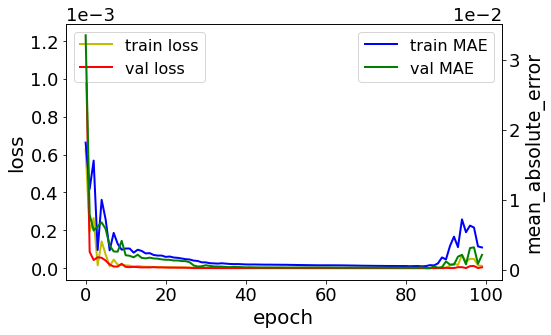

In [78]:
hist = np.load('conv_03/c1all.npy',allow_pickle='TRUE').item()
eval(hist)
plot_val3_con(conv_model, conv_window_t)

In [ ]:
#batch_plot(curv0 = [train_df_00, val_df_00, '0'] , model=conv_model, window_t=conv_window_t)
#batch_plot(curv = None, model=conv_model, window_t=conv_window_t )

## + Curve 0

In [65]:
conv_model = tf.keras.models.load_model("conv_03/c1all")

conv_window.train_df = train_df_09
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=100, verb=0)

eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)


NameError: name 'conv_window' is not defined

In [ ]:
conv_model.save("conv_03/c10")
np.save('conv_03/c10.npy', history.history)

In [ ]:
#conv_model = tf.keras.models.load_model("conv_03/c10")

train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=100, verb=0)
eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

In [ ]:
conv_model.save("conv_03/c10all")
np.save('conv_03/c10all.npy', history.history)

## +curve3

In [ ]:
conv_model = tf.keras.models.load_model("conv_03/c10all")

conv_window.train_df = train_df_39
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39

history = fit_model(conv_model, conv_window, epochs_num=100, verb=0)

eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

In [ ]:
conv_model.save("conv_03/c103")
np.save('conv_03/c103.npy', history.history)

In [ ]:
#conv_model = tf.keras.models.load_model("conv_03/c103")

train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39

history = fit_model(conv_model, conv_window, epochs_num=100, verb=0)
eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

In [ ]:
conv_model.save("conv_03/c103all")
np.save('conv_03/c103all.npy', history.history)

# repeat
### for curve0 and curve1 and curve3

In [ ]:
conv_model = tf.keras.models.load_model("conv_03/c103all")

train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19

history = fit_model(conv_model, conv_window, epochs_num=100, verb=0)
eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/c103_n1")
np.save('conv_03/c103_n1.npy', history.history)

In [ ]:
conv_model = tf.keras.models.load_model("conv_03/c103_n1")

train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39

history = fit_model(conv_model, conv_window, epochs_num=50, verb=0)
eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/c103_n13")
np.save('conv_03/c103_n13.npy', history.history)

# repeat many times 1 to 0 to 3
0-1-3
0-3-1
**1-0-3**
1-3-0
3-0-1
3-1-2

In [ ]:
conv_model = tf.keras.models.load_model("conv_03/c103_n13")
#-------------------------------------------------------
train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19

history = fit_model(conv_model, conv_window, epochs_num=100, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#-------------------------------------------------------
train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=100, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#--------------------------
train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39

history = fit_model(conv_model, conv_window, epochs_num=100, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)


#-------------------------------------------------------
train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19

history = fit_model(conv_model, conv_window, epochs_num=50, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#-------------------------------------------------------
train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=50, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#--------------------------
train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39

history = fit_model(conv_model, conv_window, epochs_num=50, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

#-------------------------------------------------------
train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#-------------------------------------------------------
train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#--------------------------
train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)


In [ ]:
#-------------------------------------------------------
train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#-------------------------------------------------------
train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#--------------------------
train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#-------------------------------------------------------
train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#-------------------------------------------------------
train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#--------------------------
train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#-------------------------------------------------------
train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#-------------------------------------------------------
train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#--------------------------
train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

In [ ]:
#-------------------------------------------------------
train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#-------------------------------------------------------
train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#--------------------------
train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#-------------------------------------------------------
train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#-------------------------------------------------------
train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#--------------------------
train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#-------------------------------------------------------
train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#-------------------------------------------------------
train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#--------------------------
train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#-------------------------------------------------------
train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#-------------------------------------------------------
train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
#--------------------------
train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

In [ ]:
conv_model.save("conv_03/c103_n13many")
np.save('conv_03/c103_n13many.npy', history.history)

## another repeat

## repeat many times 0 to 3 to 1
0-1-3
**0-3-1**
1-0-3
1-3-0
3-0-1
3-1-2
- check the variation of "losses" for every iteration step for all curves,
- repeat steps until the loss satisfys the limiting(converge) condition
  (stop condition of iteration)

In [ ]:
conv_model = tf.keras.models.load_model("conv_03/c103_n13")
#-------------------------------------------------------
train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=100, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r01")
np.save('conv_03/r01.npy',history.history)
#--------------------------
#conv_model = tf.keras.models.load_model("conv_03/r01")

train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39
history = fit_model(conv_model, conv_window, epochs_num=100, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r02")
np.save('conv_03/r02.npy',history.history)
#-------------------------------------------------------
#conv_model = tf.keras.models.load_model("conv_03/r02")

train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19
history = fit_model(conv_model, conv_window, epochs_num=100, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r03")
np.save('conv_03/r03.npy',history.history)
#++++++++++++++++++++++++++++++++++++++++++
#--1-----------------------------------------------------
#conv_model = tf.keras.models.load_model("conv_03/r03")

train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=80, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r04")
np.save('conv_03/r04.npy',history.history)
#--------------------------
#conv_model = tf.keras.models.load_model("conv_03/r04")

train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39
history = fit_model(conv_model, conv_window, epochs_num=80, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r05")
np.save('conv_03/r05.npy',history.history)

#-------------------------------------------------------
#conv_model = tf.keras.models.load_model("conv_03/r05")

train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19
history = fit_model(conv_model, conv_window, epochs_num=80, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r06")
np.save('conv_03/r06.npy',history.history)
#2++++++++++++++++++++++++++++++++++++++++
#-------------------------------------------------------
#conv_model = tf.keras.models.load_model("conv_03/r06")

train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09
history = fit_model(conv_model, conv_window, epochs_num=50, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r07")
np.save('conv_03/r07.npy',history.history)
#--------------------------
#conv_model = tf.keras.models.load_model("conv_03/r07")

train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39
history = fit_model(conv_model, conv_window, epochs_num=50, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r08")
np.save('conv_03/r08.npy',history.history)
#-------------------------------------------------------
#conv_model = tf.keras.models.load_model("conv_03/r08")

train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19
history = fit_model(conv_model, conv_window, epochs_num=50, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r09")
np.save('conv_03/r09.npy',history.history)
#++3++++++++++++++++++++++++++++++++++++++
#-------------------------------------------------------
#conv_model = tf.keras.models.load_model("conv_03/r09")

train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=30, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r10")
np.save('conv_03/r10.npy',history.history)
#--------------------------
#conv_model = tf.keras.models.load_model("conv_03/r10")

train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39
history = fit_model(conv_model, conv_window, epochs_num=30, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r11")
np.save('conv_03/r11.npy',history.history)
#-------------------------------------------------------
#conv_model = tf.keras.models.load_model("conv_03/r11")

train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19
history = fit_model(conv_model, conv_window, epochs_num=30, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r12")
np.save('conv_03/r12.npy',history.history)
#+4+++++++++++++++++++++++++++++++++++++++
#-------------------------------------------------------
#conv_model = tf.keras.models.load_model("conv_03/r12")

train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=30, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)
conv_model.save("conv_03/r13")
np.save('conv_03/r13.npy',history.history)
#--------------------------
#conv_model = tf.keras.models.load_model("conv_03/r13")

train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39
history = fit_model(conv_model, conv_window, epochs_num=30, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r14")
np.save('conv_03/r14.npy',history.history)
#-------------------------------------------------------
#conv_model = tf.keras.models.load_model("conv_03/r14")

train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19
history = fit_model(conv_model, conv_window, epochs_num=30, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r15")
np.save('conv_03/r15.npy',history.history)
#++5++++++++++++++++++++++++++++++++++++++
#-------------------------------------------------------
#conv_model = tf.keras.models.load_model("conv_03/r15")

train_df = pd.concat ([train_df_09,val_df_09], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_09
conv_window.test_df = test_df_09

history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r16")
np.save('conv_03/r16.npy',history.history)
#--------------------------
#conv_model = tf.keras.models.load_model("conv_03/r16")

train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39
history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r17")
np.save('conv_03/r17.npy',history.history)
#-------------------------------------------------------
#conv_model = tf.keras.models.load_model("conv_03/r17")

train_df = pd.concat ([train_df_19,val_df_19], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_19
conv_window.test_df = test_df_19
history = fit_model(conv_model, conv_window, epochs_num=20, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r18")
np.save('conv_03/r18.npy',history.history)
#+6+++++++++++++++++++++++++++++++++++++++

In [ ]:
#--------------------------
#conv_model = tf.keras.models.load_model("conv_03/r18")

train_df = pd.concat ([train_df_39,val_df_39], axis=0)
conv_window.train_df = train_df
conv_window.val_df = val_df_39
conv_window.test_df = test_df_39
history = fit_model(conv_model, conv_window, epochs_num=100, verb=0)
#eval(history.history)
plot_val3_con(conv_model, conv_window_t, key=0)

conv_model.save("conv_03/r19")
np.save('conv_03/r19.npy',history.history)

In [ ]:
conv_model.save("conv_03/c103_n13many2")
np.save('conv_03/c103_n13many2.npy', history.history)



--------------------------------------------------
# output summary

### loss history for every curves when one curve is trained

In [112]:
hs={"tr_loss_sum":{"c0":[],"c1":[],"c2":[],"c3":[]},
    "tr_mae_sum":{"c0":[],"c1":[],"c2":[],"c3":[]},
    "va_loss_sum":{"c0":[],"c1":[],"c2":[],"c3":[]},
    "va_mae_sum":{"c0":[],"c1":[],"c2":[],"c3":[]}}

In [113]:
def loss_sum() :
    conv_window.train_df = train_df_19
    conv_window.val_df = val_df_19
    conv_window.test_df = test_df_19
    tr_loss, tr_mae = conv_model.evaluate(conv_window.train, verbose=0)
    va_loss, va_mae = conv_model.evaluate(conv_window.val, verbose=0)
    hs["tr_loss_sum"]["c1"].append(tr_loss)
    hs["tr_mae_sum"]["c1"].append(tr_mae)
    hs["va_loss_sum"]["c1"].append(va_loss)
    hs["va_mae_sum"]["c1"].append(va_mae)
    #-----
    conv_window.train_df = train_df_09
    conv_window.val_df = val_df_09
    conv_window.test_df = test_df_09
    tr_loss, tr_mae = conv_model.evaluate(conv_window.train, verbose=0)
    va_loss, va_mae = conv_model.evaluate(conv_window.val, verbose=0)
    hs["tr_loss_sum"]["c0"].append(tr_loss)
    hs["tr_mae_sum"]["c0"].append(tr_mae)
    hs["va_loss_sum"]["c0"].append(va_loss)
    hs["va_mae_sum"]["c0"].append(va_mae)
    #-----
    conv_window.train_df = train_df_39
    conv_window.val_df = val_df_39
    conv_window.test_df = test_df_39
    tr_loss, tr_mae = conv_model.evaluate(conv_window.train, verbose=0)
    va_loss, va_mae = conv_model.evaluate(conv_window.val, verbose=0)
    hs["tr_loss_sum"]["c3"].append(tr_loss)
    hs["tr_mae_sum"]["c3"].append(tr_mae)
    hs["va_loss_sum"]["c3"].append(va_loss)
    hs["va_mae_sum"]["c3"].append(va_mae)
    #-----
    conv_window.train_df = train_df_29
    conv_window.val_df = val_df_29
    conv_window.test_df = test_df_29
    tr_loss, tr_mae = conv_model.evaluate(conv_window.train, verbose=0)
    va_loss, va_mae = conv_model.evaluate(conv_window.val, verbose=0)
    hs["tr_loss_sum"]["c2"].append(tr_loss)
    hs["tr_mae_sum"]["c2"].append(tr_mae)
    hs["va_loss_sum"]["c2"].append(va_loss)
    hs["va_mae_sum"]["c2"].append(va_mae)

    return(hs)

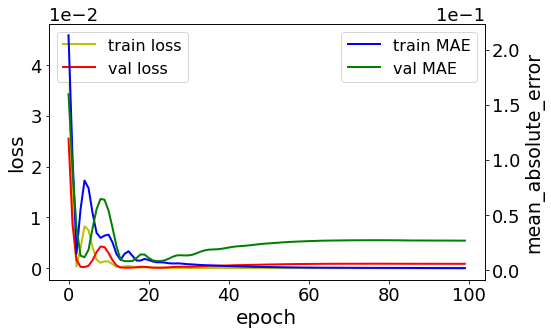

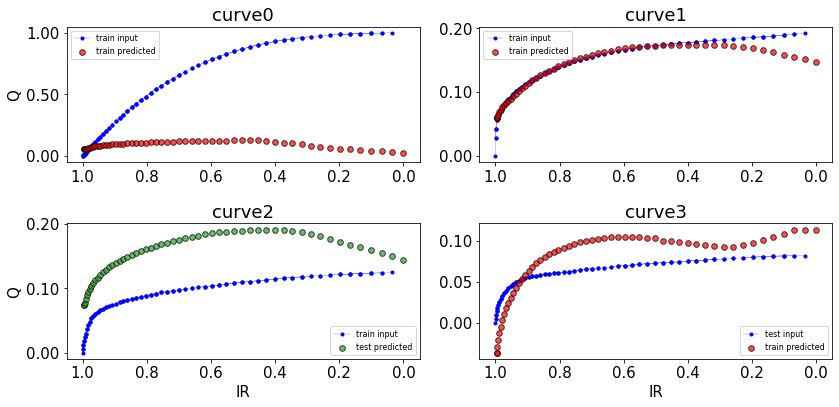

In [137]:
conv_model = tf.keras.models.load_model("conv_03/c1")
history=np.load('conv_03/c1.npy',allow_pickle='TRUE').item()

eval(history)
plt.savefig("fig_con_03/c1_los.png", dpi=300)
plot_val3_con(conv_model, conv_window_t, key=0)
plt.tight_layout()
#plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig("fig_con_03/c1.png", dpi=300)

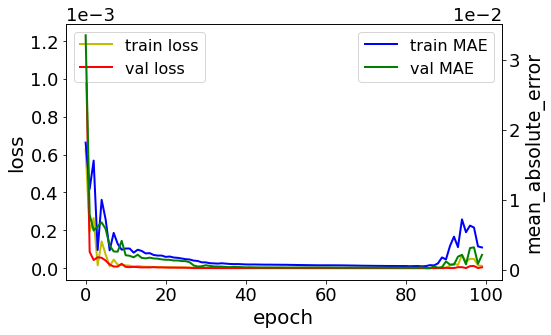

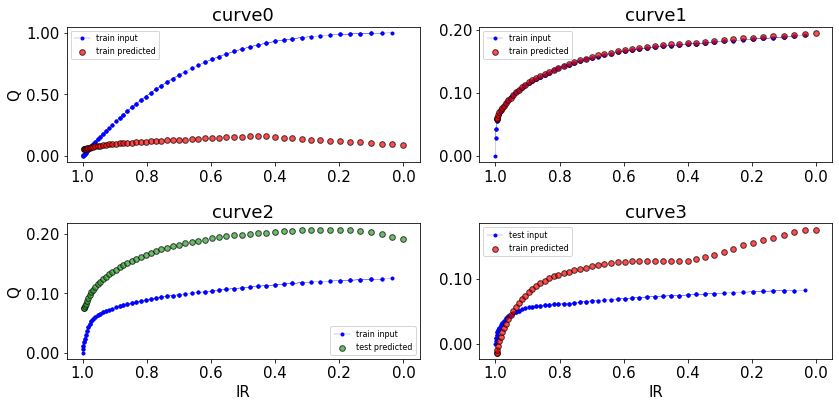

In [138]:
conv_model = tf.keras.models.load_model("conv_03/c1all")
history=np.load('conv_03/c1all.npy',allow_pickle='TRUE').item()

eval(history)
plt.savefig("fig_con_03/c1all-loss.png", dpi=300)
plot_val3_con(conv_model, conv_window_t, key=0)
plt.tight_layout()
#plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig("fig_con_03/c1all.png", dpi=300)

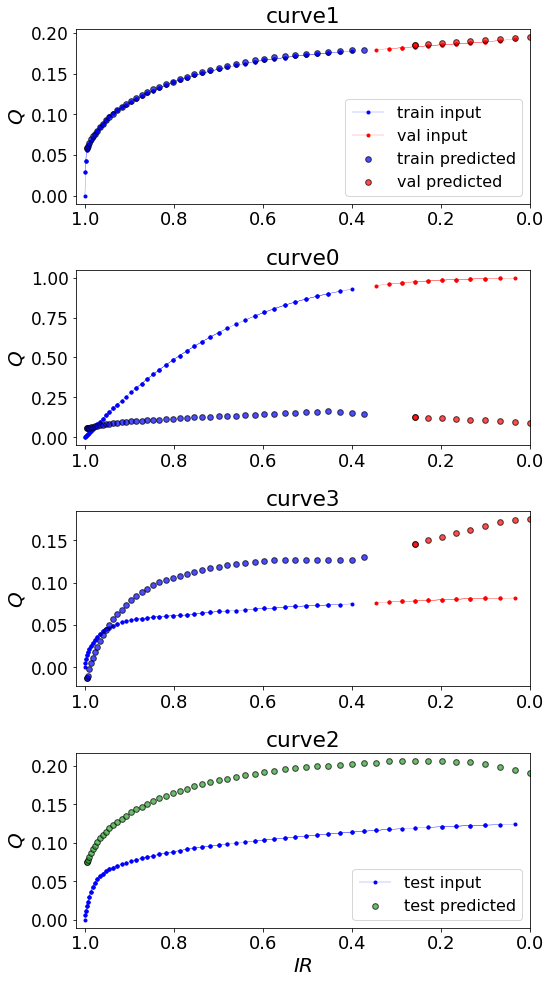

In [170]:
plot_val_con(conv_model, conv_window_t, key=0)
plt.savefig("fig_con_03/c1all_01.png", dpi=300)

In [139]:
#conv_model = tf.keras.models.load_model("conv_03/c1all")
#history=np.load('conv_03/c1all.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/hs_c1all.npy',hs)

#### +curve0

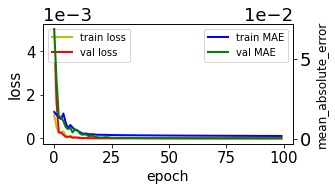

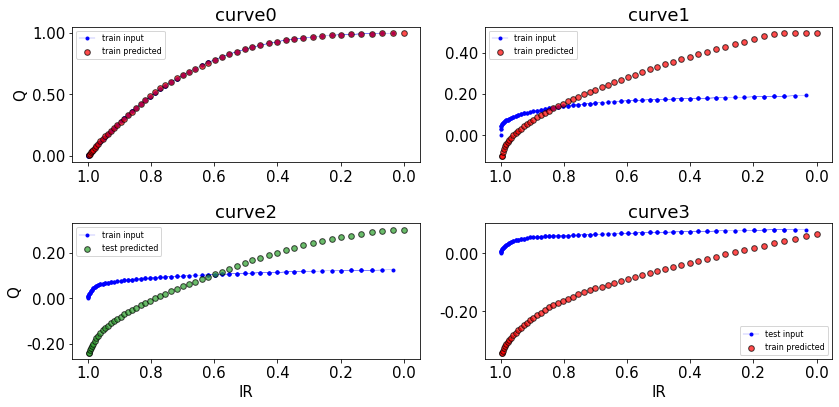

In [117]:
conv_model = tf.keras.models.load_model("conv_03/c10all")
history=np.load('conv_03/c10all.npy',allow_pickle='TRUE').item()

eval(history)
plt.savefig("fig_con_03/c10all-loss.png", dpi=300)
plot_val3_con(conv_model, conv_window_t, key=0)
plt.tight_layout()
#plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig("fig_con_03/c10all.png", dpi=300)

In [118]:
#conv_model = tf.keras.models.load_model("conv_03/c10all")
#history=np.load('conv_03/c1all.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/hs_c10all.npy',hs)

## +curve3

In [ ]:
conv_model = tf.keras.models.load_model("conv_03/c103all")
history=np.load('conv_03/c103all.npy',allow_pickle='TRUE').item()

eval(history)
plt.savefig("fig_con_03/c103all-loss.png", dpi=300)
plot_val3_con(conv_model, conv_window_t, key=0)
plt.tight_layout()
#plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig("fig_con_03/c103all.png", dpi=300)

In [ ]:
#conv_model = tf.keras.models.load_model("conv_03/c103all")
#history=np.load('conv_03/c103all.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/hs_c103all.npy',hs)

# repeat many times 1 to 0 to 3

In [ ]:
conv_model = tf.keras.models.load_model("conv_03/c103_n1")
history=np.load('conv_03/c103_n1.npy',allow_pickle='TRUE').item()

eval(history)
plt.savefig("fig_con_03/c103_n1-loss.png", dpi=300)
plot_val3_con(conv_model, conv_window_t, key=0)
plt.tight_layout()
#plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig("fig_con_03/c103_n1.png", dpi=300)

In [ ]:
conv_model = tf.keras.models.load_model("conv_03/c103_n1")
#hs2=np.load('conv_03/loss/hs_c103all.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/c103_n1.npy',hs)

In [ ]:
conv_model = tf.keras.models.load_model("conv_03/c103_n13")
history=np.load('conv_03/c103_n1.npy',allow_pickle='TRUE').item()

eval(history)
plt.savefig("fig_con_03/c103_n13-loss.png", dpi=300)
plot_val3_con(conv_model, conv_window_t, key=0)
plt.tight_layout()
#plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig("fig_con_03/c103_n13.png", dpi=300)

In [ ]:
conv_model = tf.keras.models.load_model("conv_03/c103_n13")
#hs2=np.load('conv_03/loss/hs_c103all.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/c103_n13.npy',hs)

### repeat

In [ ]:
for i in range(1,19) :
    if i >= 10 :
        conv_model = tf.keras.models.load_model("conv_03/r"+str(i))
        hs = loss_sum()
        np.save('conv_03/loss/r'+str(i)+'.npy',hs)
    else:
        conv_model = tf.keras.models.load_model("conv_03/r0"+str(i))
        hs = loss_sum()
        np.save('conv_03/loss/r0'+str(i)+'.npy',hs)




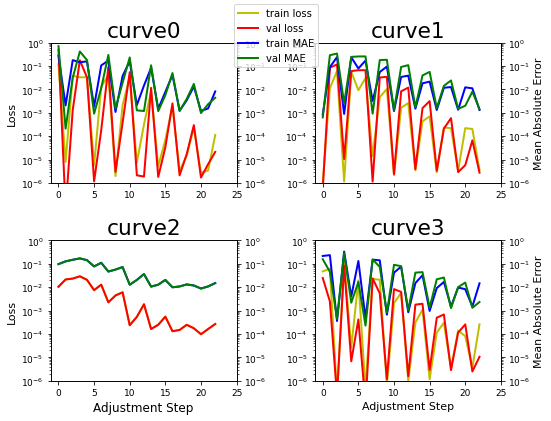

In [282]:
hs =np.load('conv_03/loss/r18.npy',allow_pickle='TRUE').item()

import matplotlib.ticker as ticker

fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=2)

axes[0, 0].plot(hs["tr_loss_sum"]['c0'], color='y', label="train loss")
#axes[0, 0].plot(hs["tr_loss_sum"]['c0'], marker='o', color='g', label="train loss")
axes[0, 0].plot(hs["va_loss_sum"]['c0'], color='r', label="val loss")

#plt.gca().set_xticklabels( fontsize=10)

axes[0,0].set_yscale('log')
axes[0,0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

cr_axes1 = axes[0,0].twinx()
cr_axes1.set_yscale('log')

cr_axes1.plot(hs["tr_mae_sum"]['c0'],color='b', label="train MAE")
cr_axes1.plot(hs["va_mae_sum"]['c0'],color='g', label="val MAE")
axes[0, 0].set_xticks(np.arange(0, 30, 5))
cr_axes1.set_xticks(np.arange(0, 30, 5))

axes[0, 0].tick_params(labelsize=9)
cr_axes1.tick_params(labelsize=9)

axes[0, 0].set_ylabel('Loss', fontsize=11)
#cr_axes1.set_ylabel('MAE', fontsize=10)
axes[0, 0].set_title("curve0")

axes[0, 0].set_ylim(1e-6, 1 )
cr_axes1.set_ylim(1e-6, 1 )

#----------
axes[0, 1].plot(hs["tr_loss_sum"]['c1'], color='y' )
axes[0, 1].plot(hs["va_loss_sum"]['c1'], color='r')

axes[0,1].set_yscale('log')
axes[0,1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
cr_axes2 = axes[0,1].twinx()
cr_axes2.set_yscale('log')

cr_axes2.plot(hs["tr_mae_sum"]['c1'],color='b')
cr_axes2.plot(hs["va_mae_sum"]['c1'],color='g')
axes[0, 1].set_xticks(np.arange(0, 30, 5))
cr_axes2.set_xticks(np.arange(0, 30, 5))

cr_axes2.set_ylabel('Mean Absolute Error', fontsize=11)
axes[0, 1].set_title("curve1")

axes[0, 1].tick_params(labelsize=9)
cr_axes2.tick_params(labelsize=9)

axes[0, 1].set_ylim(1e-6, 1 )
cr_axes2.set_ylim(1e-6, 1 )
#----------
axes[1, 0].plot(hs["tr_loss_sum"]['c2'], color='y')
axes[1, 0].plot(hs["va_loss_sum"]['c2'], color='r')

axes[1,0].set_yscale('log')
axes[1,0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
cr_axes3 = axes[1,0].twinx()
cr_axes3.set_yscale('log')

cr_axes3.plot(hs["tr_mae_sum"]['c2'],color='b')
cr_axes3.plot(hs["va_mae_sum"]['c2'],color='g')
axes[1, 0].set_xticks(np.arange(0, 30, 5))
cr_axes3.set_xticks(np.arange(0, 30, 5))

axes[1, 0].set_ylabel('Loss', fontsize=11)
axes[1, 0].set_xlabel('Adjustment Step', fontsize=12)
axes[1, 0].set_title("curve2")

axes[1, 0].tick_params(labelsize=9)
cr_axes3.tick_params(labelsize=9)

axes[1, 0].set_ylim(1e-6, 1 )
cr_axes3.set_ylim(1e-6, 1 )
#----------
axes[1, 1].plot(hs["tr_loss_sum"]['c3'], color='y')
axes[1, 1].plot(hs["va_loss_sum"]['c3'], color='r')

axes[1,1].set_yscale('log')
axes[1,1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
cr_axes4 = axes[1,1].twinx()
cr_axes4.set_yscale('log')

cr_axes4.plot(hs["tr_mae_sum"]['c3'],color='b')
cr_axes4.plot(hs["va_mae_sum"]['c3'],color='g')
axes[1, 1].set_xticks(np.arange(0, 30, 5))
cr_axes4.set_xticks(np.arange(0, 30, 5))

cr_axes4.set_ylabel('Mean Absolute Error', fontsize=11)
axes[1, 1].set_xlabel('Adjustment Step', fontsize=11)
axes[1, 1].set_title("curve3")
axes[1, 1].set_ylim(1e-6, 1 )
cr_axes4.set_ylim(1e-6, 1 )

axes[1, 1].tick_params(labelsize=9)
cr_axes4.tick_params(labelsize=9)

#axes[1, 1].set_yticks([1e-6,1e-4,1e-2,1])
#axes[1, 1].get_yaxis().set_major_formatter(ticker.ScalarFormatter())
#cr_axes4.set_yticks([1e-6,1e-4,1e-2,1])
#cr_axes4.get_yaxis().set_major_formatter(ticker.ScalarFormatter())

lines = []
labels = []
for ax in fig.axes:
	Line, Label = ax.get_legend_handles_labels()
	# print(Label)
	lines.extend(Line)
	labels.extend(Label)

fig.legend(lines, labels, loc='upper center', fontsize=10)

fig.tight_layout()
plt.show()


fig.savefig("fig_con_03/adjust.png", dpi=300)

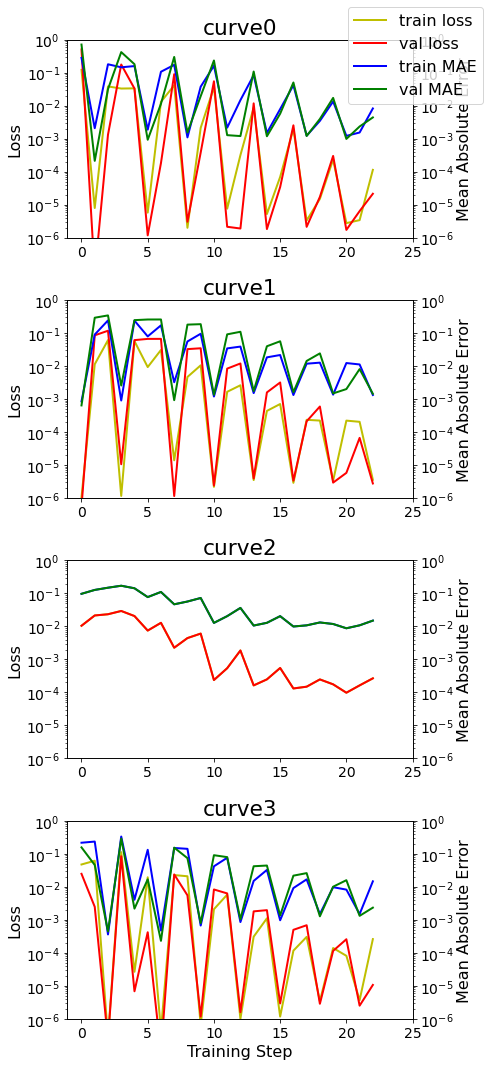

In [296]:
hs =np.load('conv_03/loss/r18.npy',allow_pickle='TRUE').item()

import matplotlib.ticker as ticker

fig = plt.figure(figsize=(7,15))
axes = fig.subplots(nrows=4, ncols=1 )

axes[0].plot(hs["tr_loss_sum"]['c0'], color='y', label="train loss")
#axes[0, 0].plot(hs["tr_loss_sum"]['c0'], marker='o', color='g', label="train loss")
axes[0].plot(hs["va_loss_sum"]['c0'], color='r', label="val loss")

#plt.gca().set_xticklabels( fontsize=10)

axes[0].set_yscale('log')
axes[0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

cr_axes1 = axes[0].twinx()
cr_axes1.set_yscale('log')

cr_axes1.plot(hs["tr_mae_sum"]['c0'],color='b', label="train MAE")
cr_axes1.plot(hs["va_mae_sum"]['c0'],color='g', label="val MAE")
axes[0].set_xticks(np.arange(0, 30, 5))
cr_axes1.set_xticks(np.arange(0, 30, 5))

axes[0].tick_params(labelsize=14)
cr_axes1.tick_params(labelsize=14)

axes[0].set_ylabel('Loss', fontsize=16)
#cr_axes1.set_ylabel('MAE', fontsize=10)
axes[0].set_title("curve0")
cr_axes1.set_ylabel('Mean Absolute Error', fontsize=16)

axes[0].set_ylim(1e-6, 1 )
cr_axes1.set_ylim(1e-6, 1 )

#----------
axes[1].plot(hs["tr_loss_sum"]['c1'], color='y' )
axes[1].plot(hs["va_loss_sum"]['c1'], color='r')

axes[1].set_yscale('log')
axes[1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
cr_axes2 = axes[1].twinx()
cr_axes2.set_yscale('log')

cr_axes2.plot(hs["tr_mae_sum"]['c1'],color='b')
cr_axes2.plot(hs["va_mae_sum"]['c1'],color='g')
axes[1].set_xticks(np.arange(0, 30, 5))
cr_axes2.set_xticks(np.arange(0, 30, 5))

cr_axes2.set_ylabel('Mean Absolute Error', fontsize=16)
axes[1].set_title("curve1")
axes[1].set_ylabel('Loss', fontsize=16)

axes[1].tick_params(labelsize=14)
cr_axes2.tick_params(labelsize=14)

axes[1].set_ylim(1e-6, 1 )
cr_axes2.set_ylim(1e-6, 1 )
#----------
axes[2].plot(hs["tr_loss_sum"]['c2'], color='y')
axes[2].plot(hs["va_loss_sum"]['c2'], color='r')

axes[2].set_yscale('log')
axes[2].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
cr_axes3 = axes[2].twinx()
cr_axes3.set_yscale('log')

cr_axes3.plot(hs["tr_mae_sum"]['c2'],color='b')
cr_axes3.plot(hs["va_mae_sum"]['c2'],color='g')
axes[2].set_xticks(np.arange(0, 30, 5))
cr_axes3.set_xticks(np.arange(0, 30, 5))

axes[2].set_ylabel('Loss', fontsize=16)
#axes[2].set_xlabel('Adjustment Step', fontsize=16)
axes[2].set_title("curve2")

axes[2].tick_params(labelsize=14)
cr_axes3.tick_params(labelsize=14)
cr_axes3.set_ylabel('Mean Absolute Error', fontsize=16)

axes[2].set_ylim(1e-6, 1 )
cr_axes3.set_ylim(1e-6, 1 )
#----------
axes[3].plot(hs["tr_loss_sum"]['c3'], color='y')
axes[3].plot(hs["va_loss_sum"]['c3'], color='r')

axes[3].set_yscale('log')
axes[3].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
cr_axes4 = axes[3].twinx()
cr_axes4.set_yscale('log')

cr_axes4.plot(hs["tr_mae_sum"]['c3'],color='b')
cr_axes4.plot(hs["va_mae_sum"]['c3'],color='g')
axes[3].set_xticks(np.arange(0, 30, 5))
cr_axes4.set_xticks(np.arange(0, 30, 5))

cr_axes4.set_ylabel('Mean Absolute Error', fontsize=16)
axes[3].set_xlabel('Training Step', fontsize=16)
axes[3].set_title("curve3")
axes[3].set_ylim(1e-6, 1 )
cr_axes4.set_ylim(1e-6, 1 )
axes[3].set_ylabel('Loss', fontsize=16)

axes[3].tick_params(labelsize=14)
cr_axes4.tick_params(labelsize=14)

#axes[1, 1].set_yticks([1e-6,1e-4,1e-2,1])
#axes[1, 1].get_yaxis().set_major_formatter(ticker.ScalarFormatter())
#cr_axes4.set_yticks([1e-6,1e-4,1e-2,1])
#cr_axes4.get_yaxis().set_major_formatter(ticker.ScalarFormatter())

lines = []
labels = []
for ax in fig.axes:
	Line, Label = ax.get_legend_handles_labels()
	# print(Label)
	lines.extend(Line)
	labels.extend(Label)

fig.legend(lines, labels, loc='upper right', fontsize=16)




fig.tight_layout()
plt.show()


fig.savefig("fig_con_03/adjust_1d.png", dpi=300)


In [ ]:
"""
conv_model = tf.keras.models.load_model("conv_03/r01")
hs = loss_sum()
np.save('conv_03/loss/r01.npy',hs)


conv_model = tf.keras.models.load_model("conv_03/r02")
hs = loss_sum()
np.save('conv_03/loss/r02.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r03")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r03.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r04")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r04.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r05")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r05.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r06")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r06.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r07")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r07.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r08")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r08.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r09")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r09.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r10")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r10.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r11")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r11.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r12")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r12.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r13")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r13.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r14")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r14.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r15")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r15.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r16")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r16.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r17")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r17.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r18")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r18.npy',hs)

conv_model = tf.keras.models.load_model("conv_03/r19")
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()
hs = loss_sum()
np.save('conv_03/loss/r19.npy',hs)

"""

# batch plot

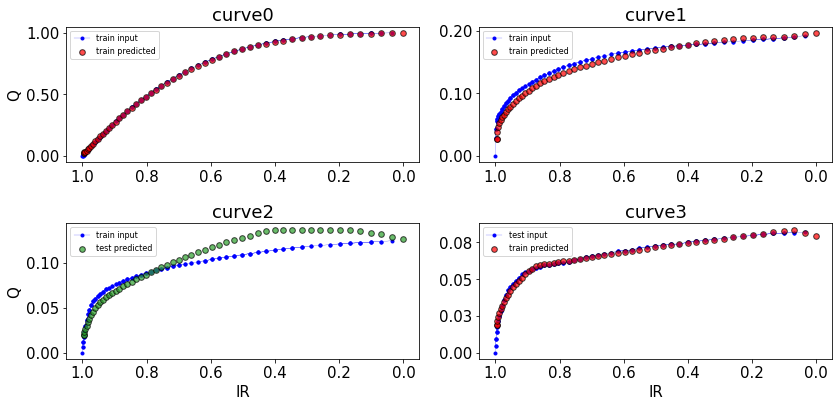

In [173]:
conv_model = tf.keras.models.load_model("conv_03/r19")
hist=np.load('conv_03/loss/r18.npy',allow_pickle='TRUE').item()

plot_val3_con(conv_model, conv_window_t )

plt.savefig("fig_con_03/result3.png", dpi=300)

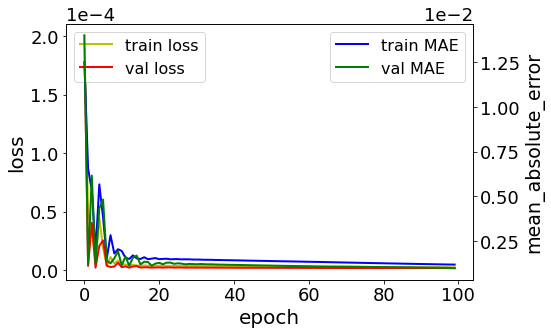

In [174]:
hist = np.load('conv_03/r19.npy',allow_pickle='TRUE').item()

eval(hist)

Saving figure predict_final


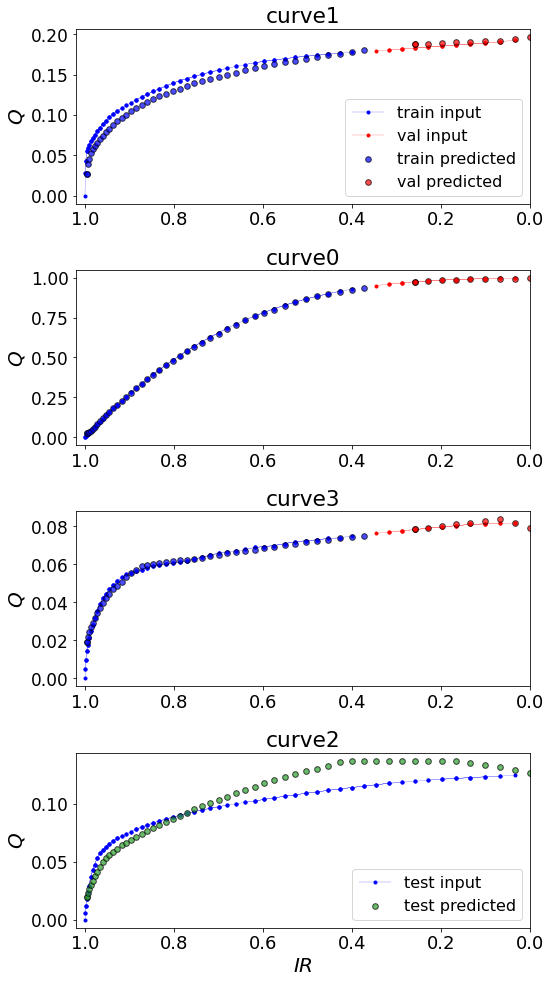

In [281]:
plot_val_con(conv_model, conv_window_t )

save_fig("predict_final")

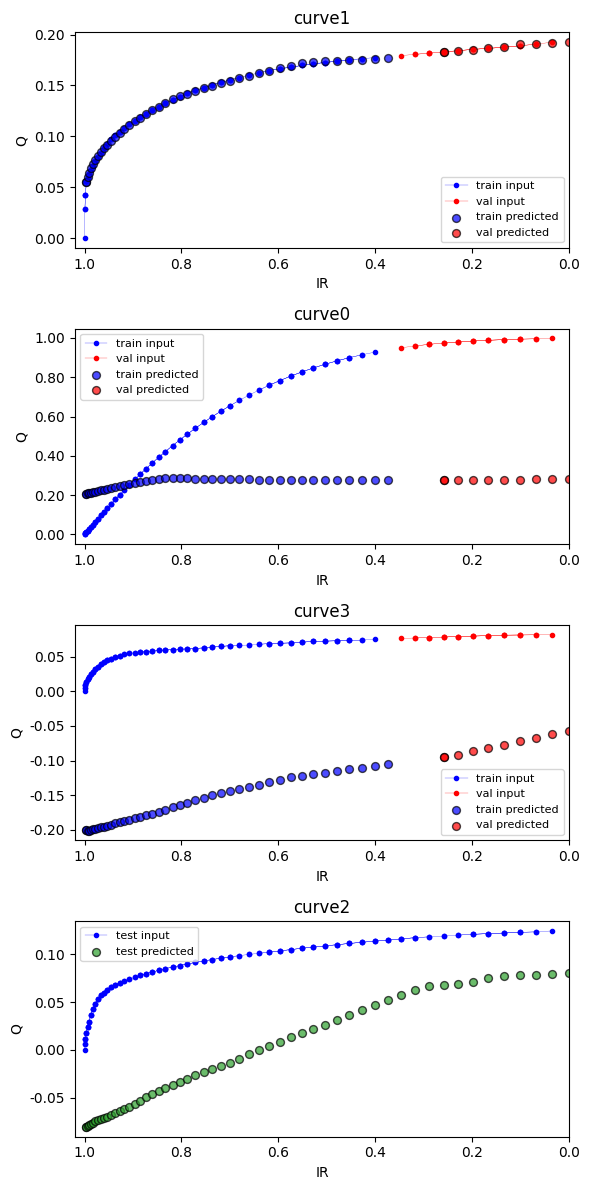

In [79]:
conv_model = tf.keras.models.load_model("conv_03/c1all")
hist=np.load('conv_03/c1all.npy',allow_pickle='TRUE').item()

plot_val_con(conv_model, conv_window_t )
plt.savefig("fig_con_03/c1all-s.png", dpi=300)

In [ ]:
eval(hist)

Text(0.5, 1.0, 'Curve 1')

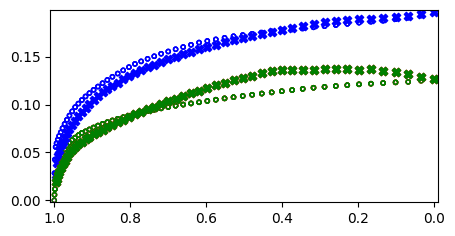

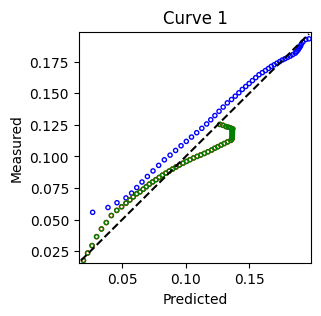

In [81]:
#conv_window_t.train_df = train_df_19
conv_window_t.train_df = train_df_1_tot

conv_window_t.plot_xy(conv_model,  n_batch=10 )
plt.gca().set_title('Curve 1')

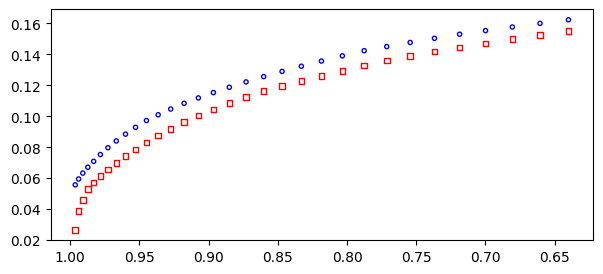

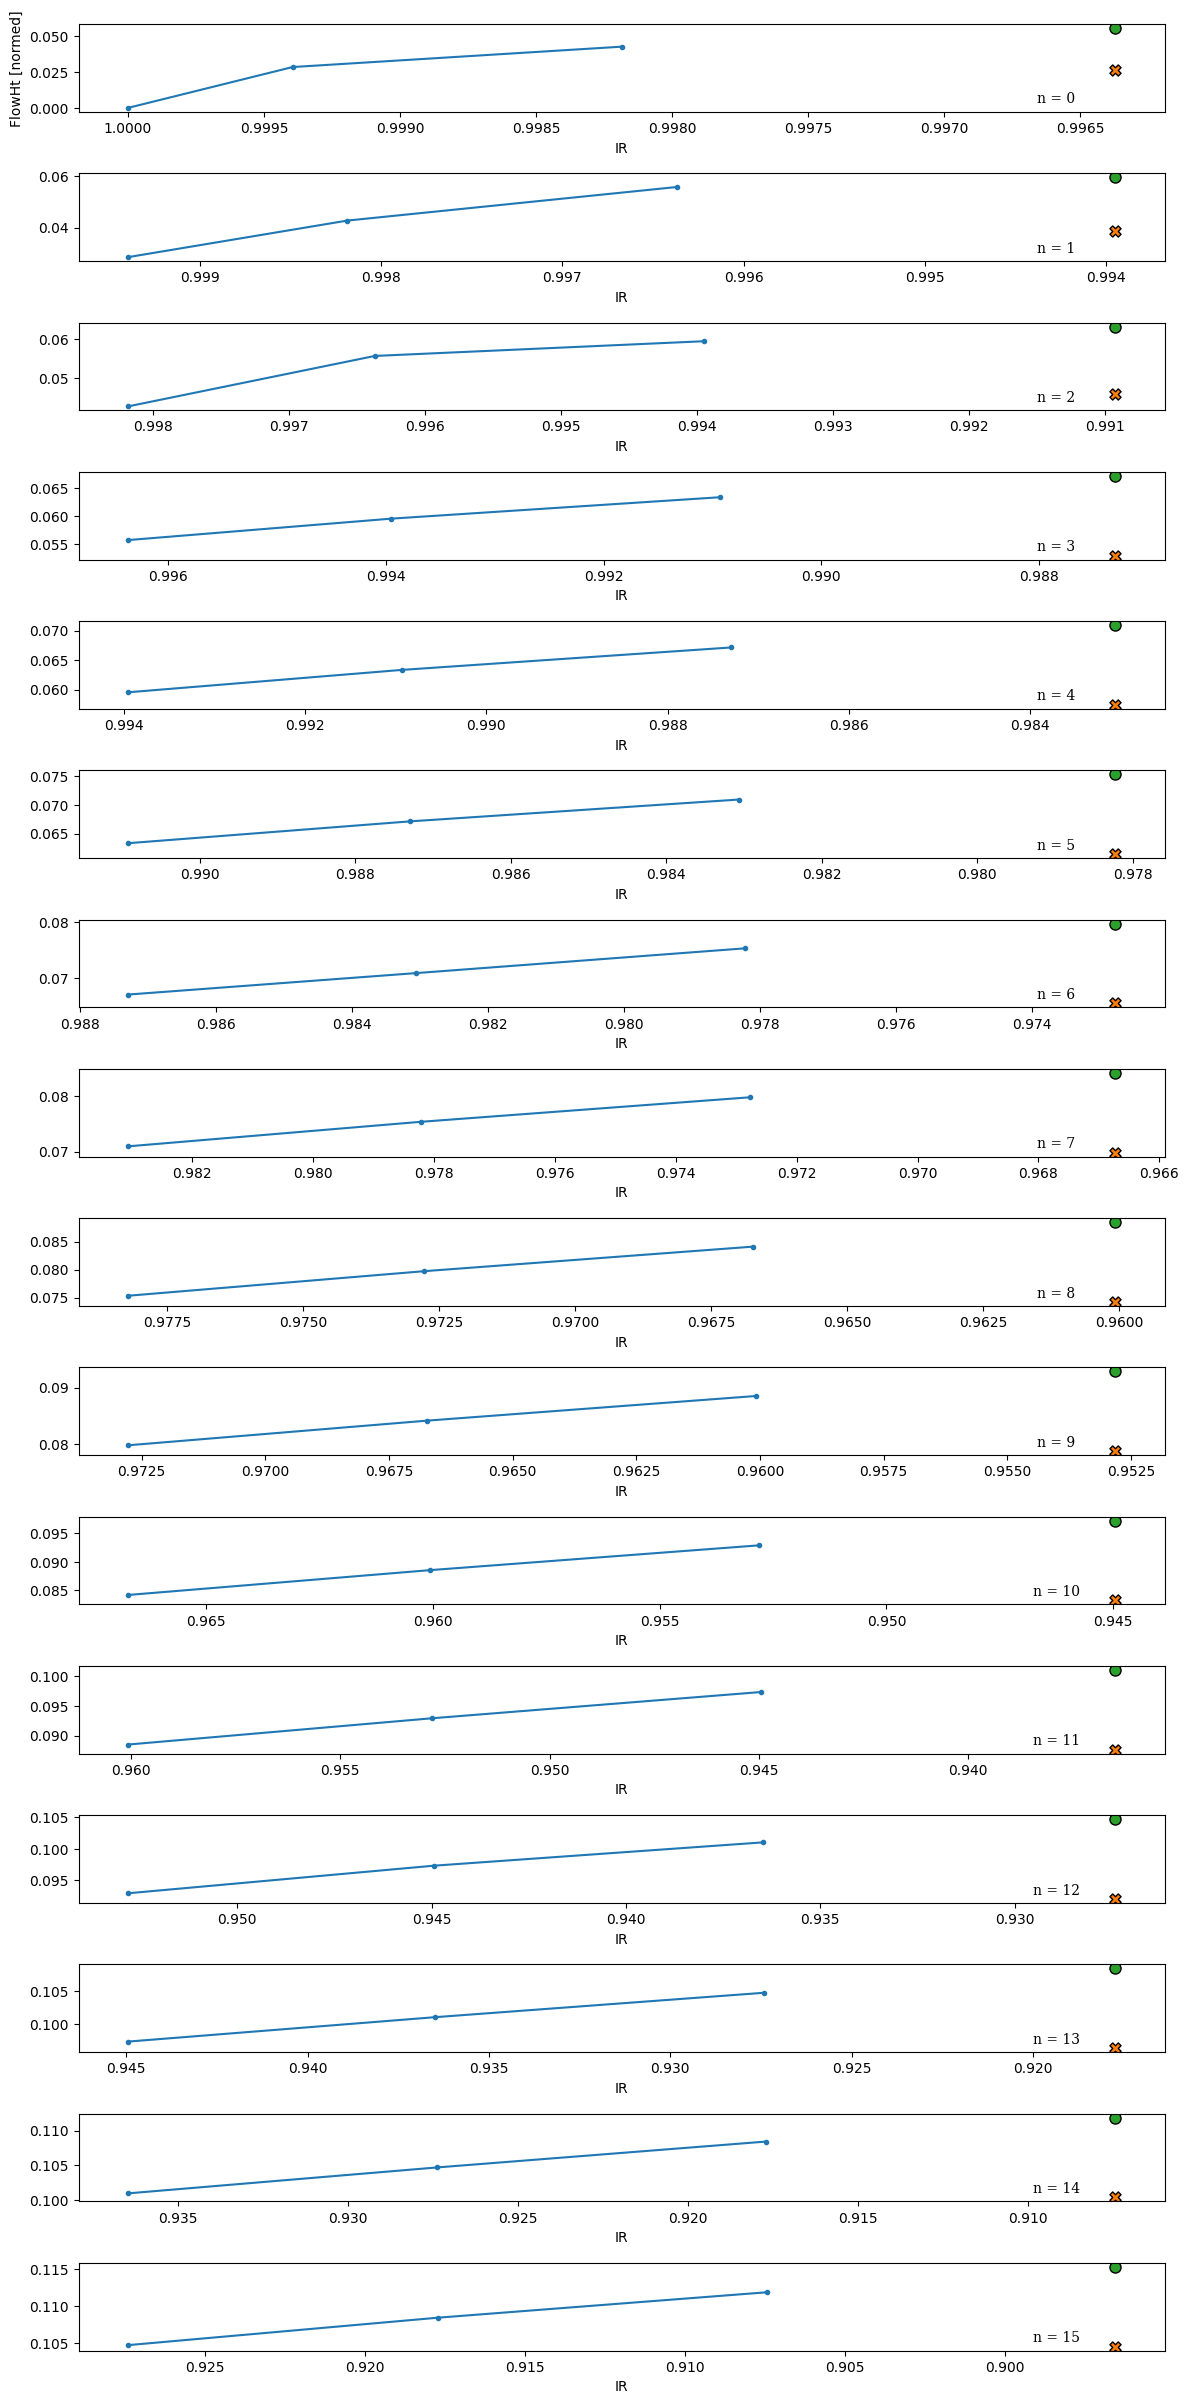

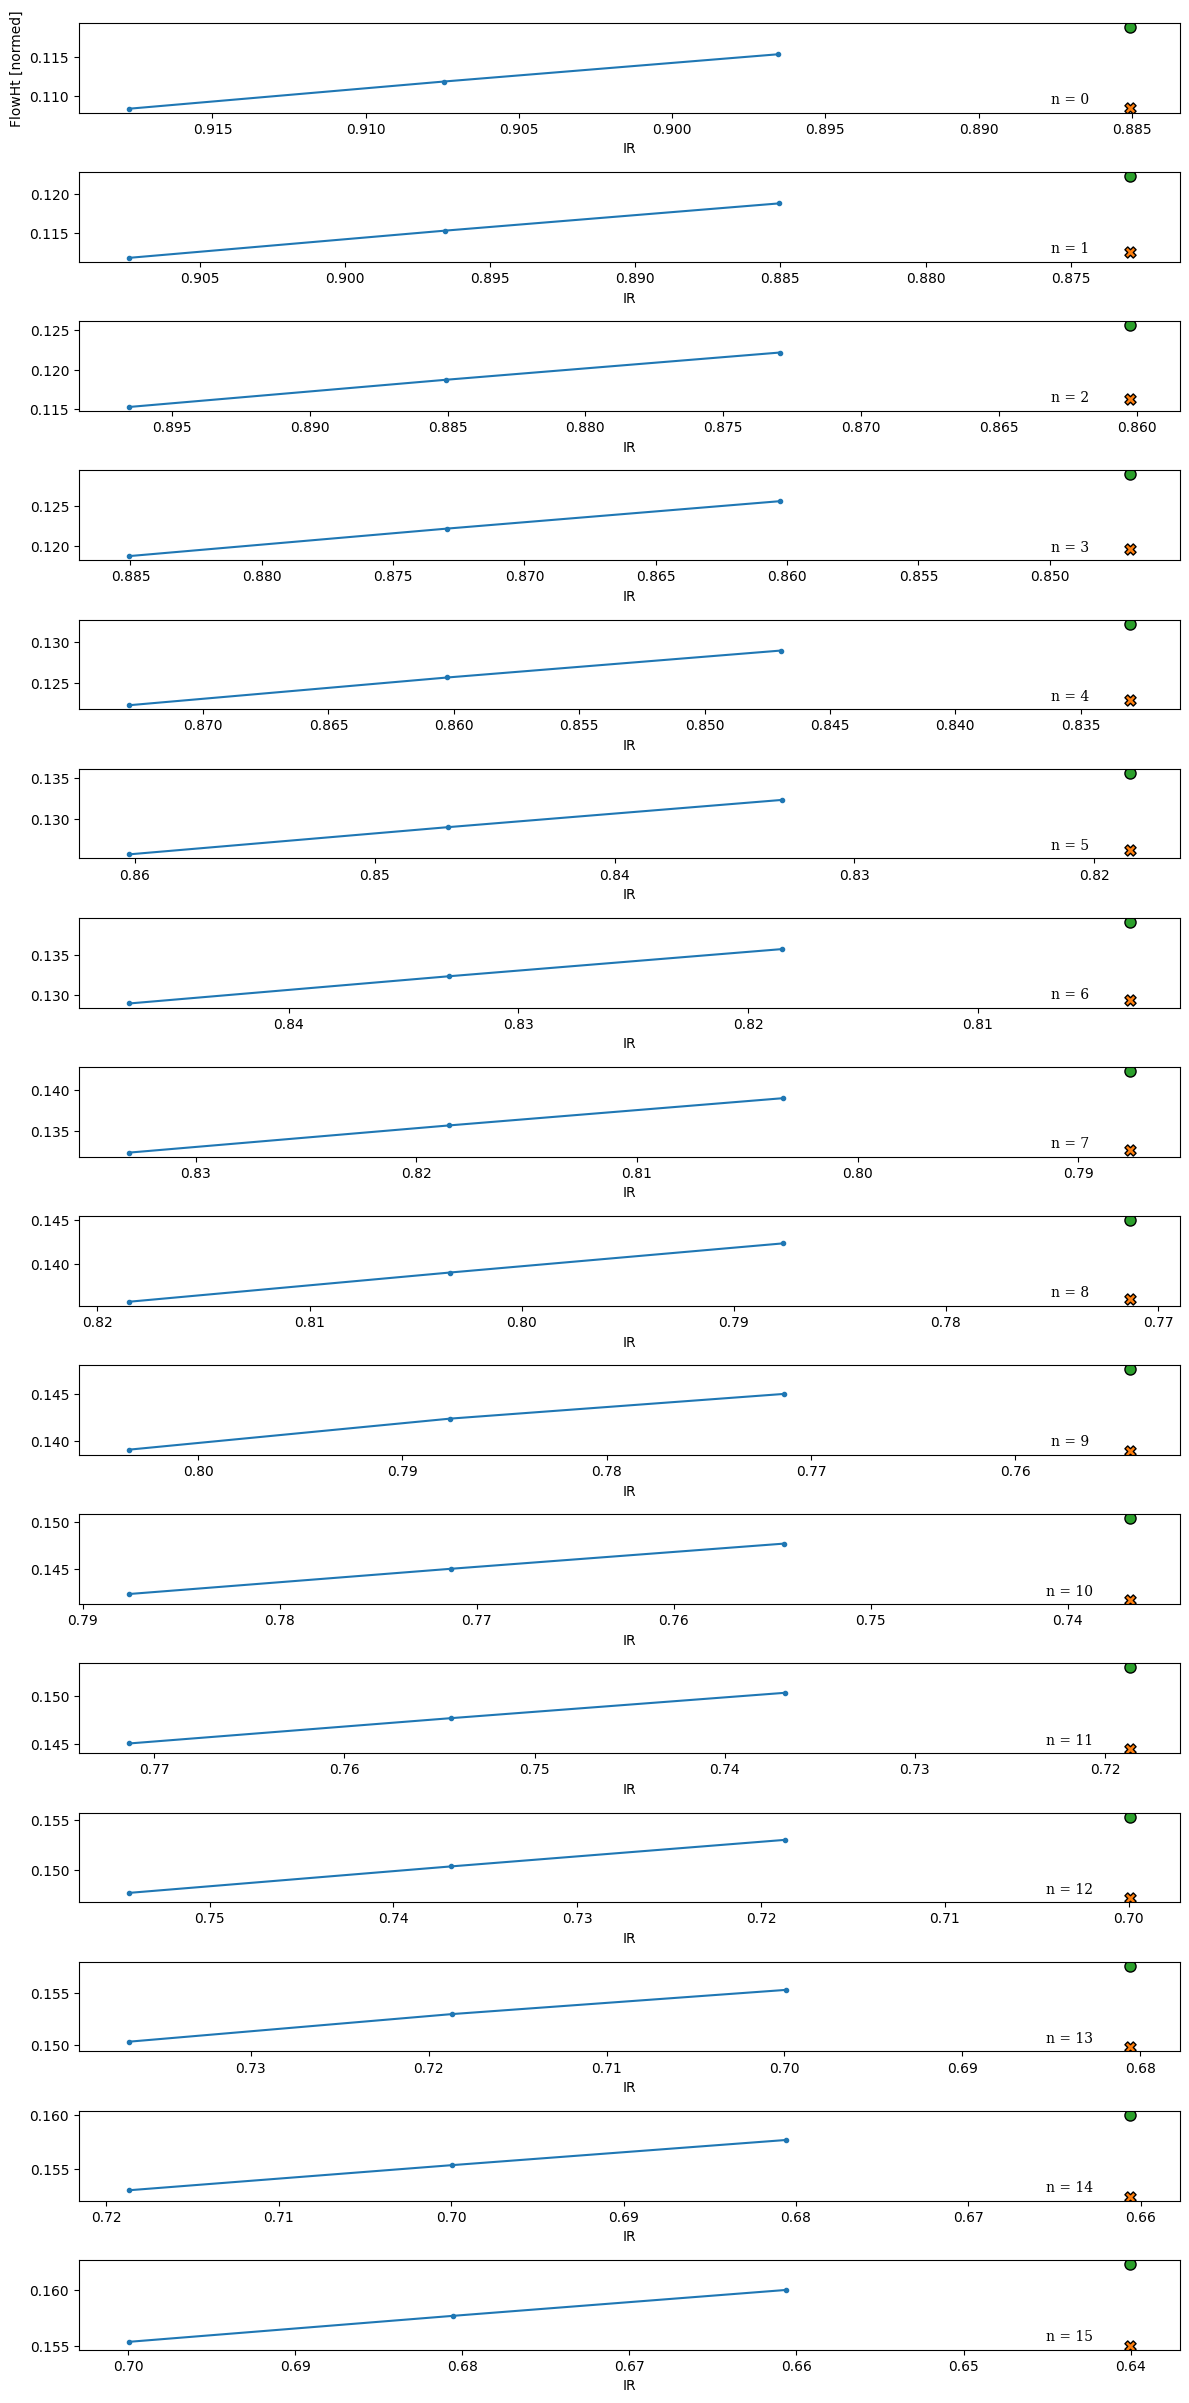

In [82]:
conv_window_t.plot_batch(conv_model,n_batch = 1, figures='True')

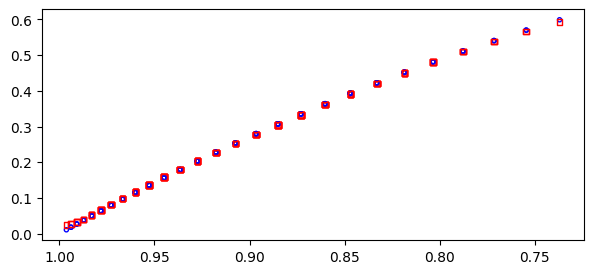

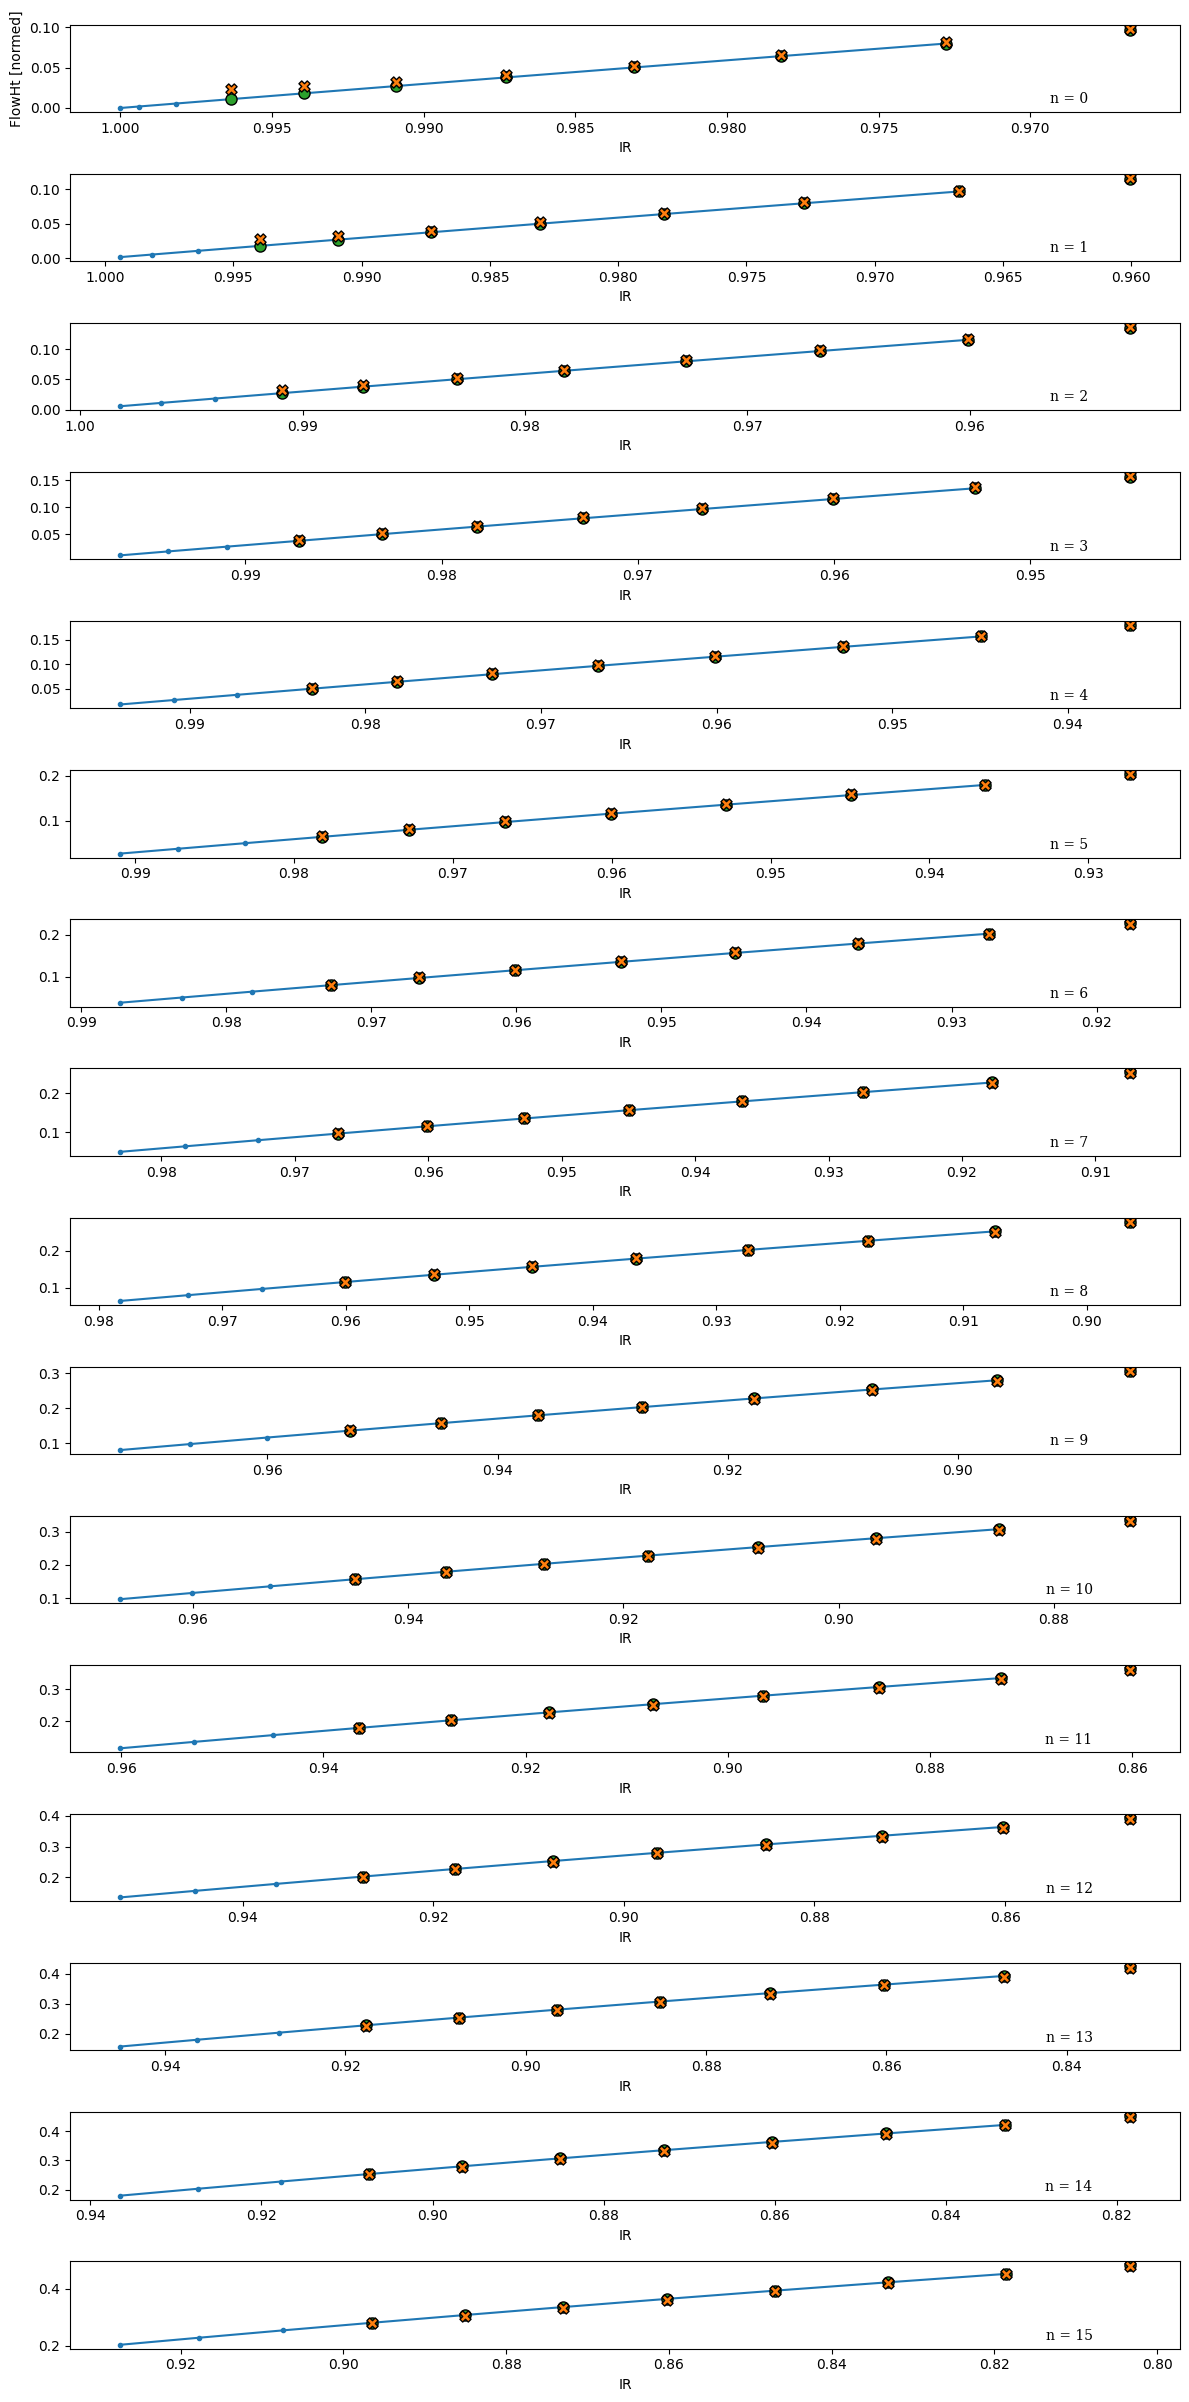

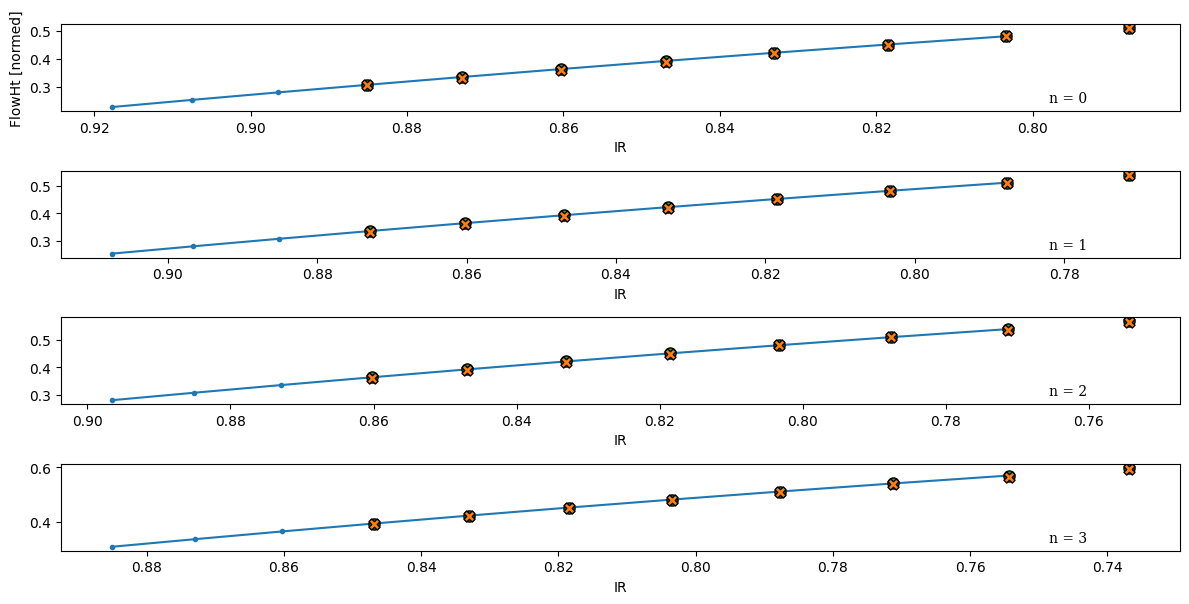

In [80]:
wide_conv_window_t.plot_batch(conv_model,n_batch = 1, figures='True')

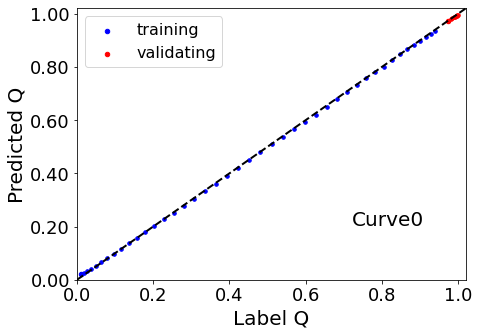

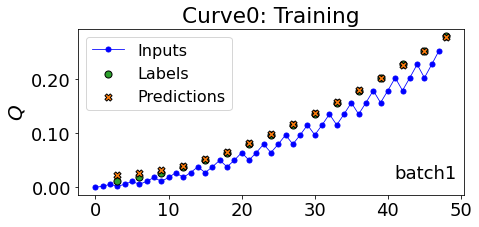

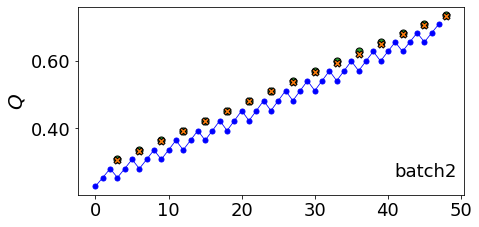

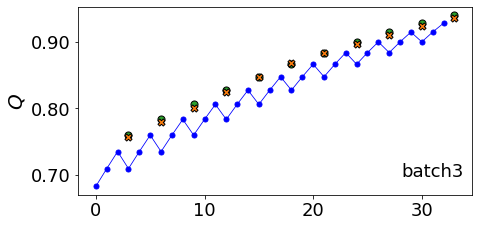

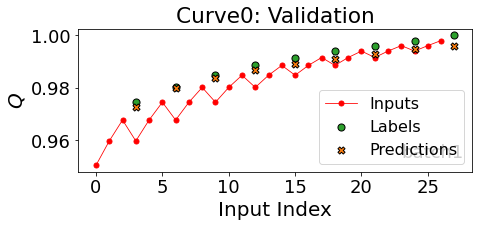

In [208]:
conv_model = tf.keras.models.load_model("conv_03/r19")

batch_plot(curv0 =  [train_df_09, val_df_09, '0'], model=conv_model, window_t=conv_window_t )

plt.savefig("fig_con_03/batch0.png", dpi=300)

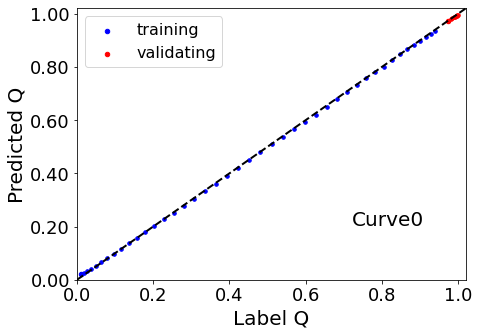

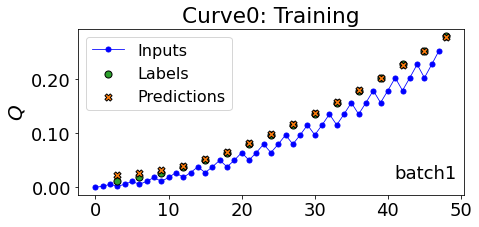

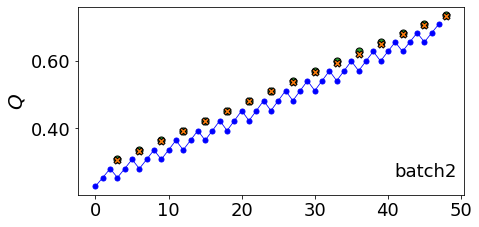

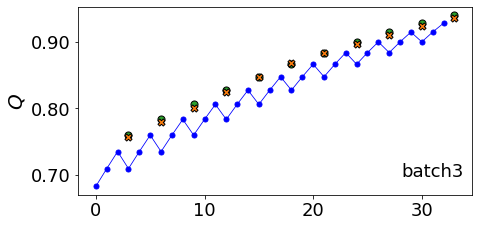

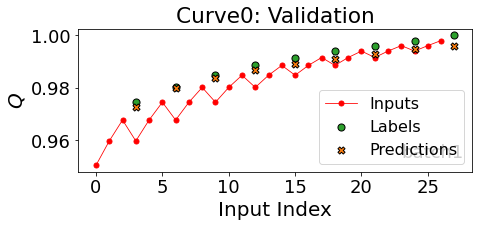

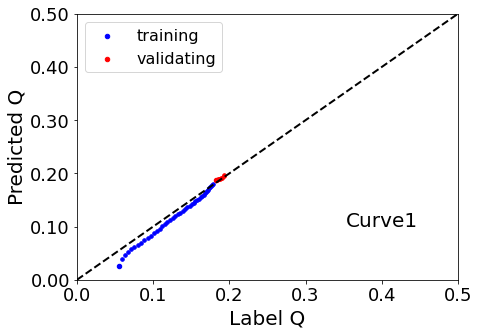

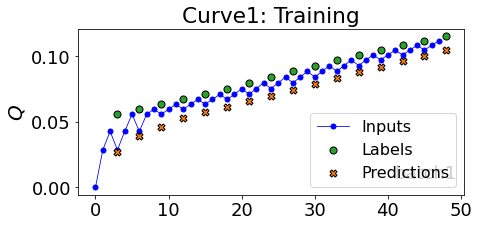

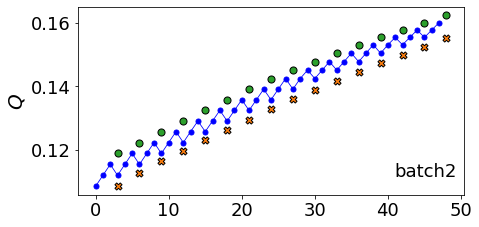

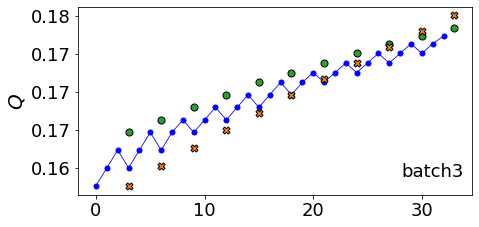

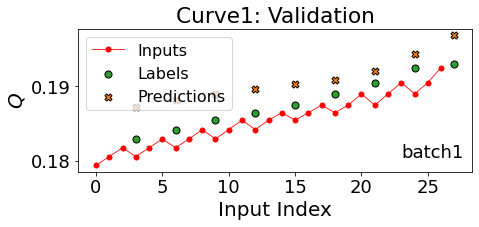

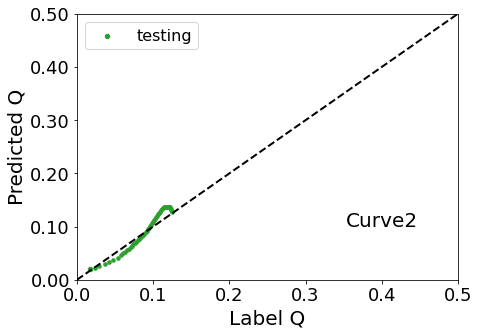

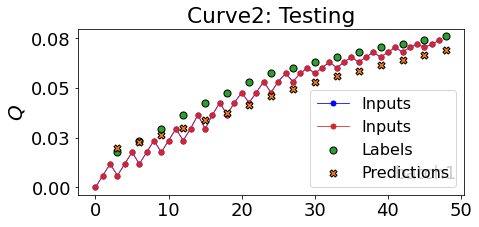

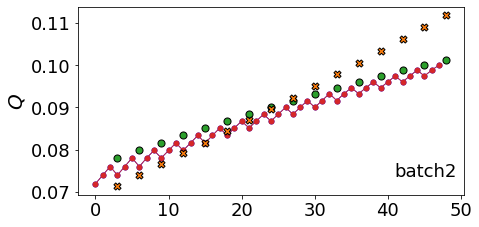

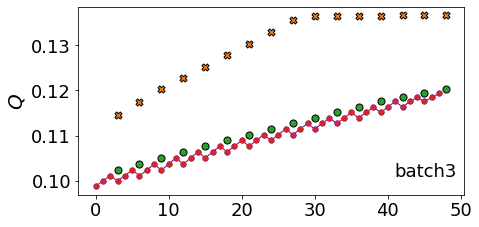

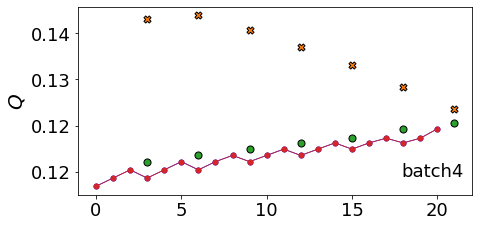

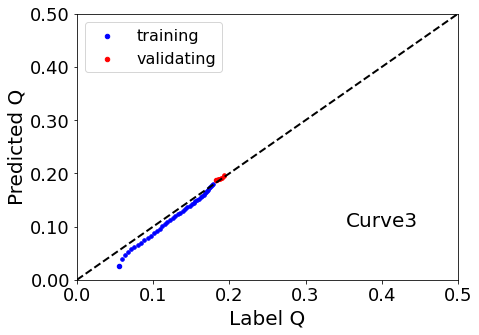

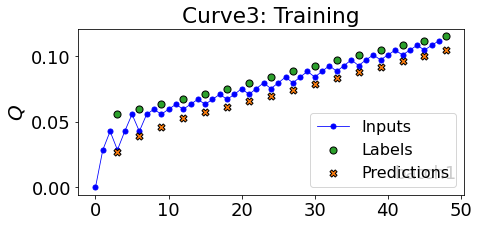

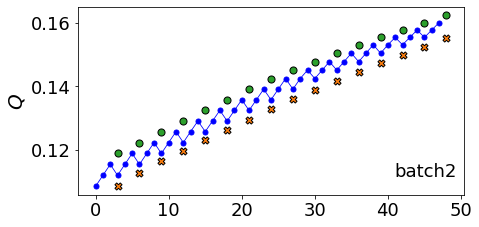

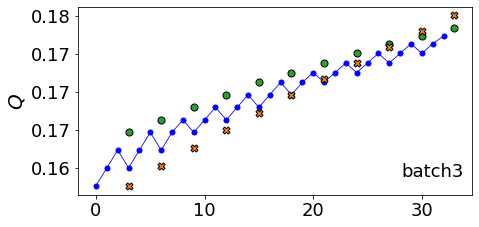

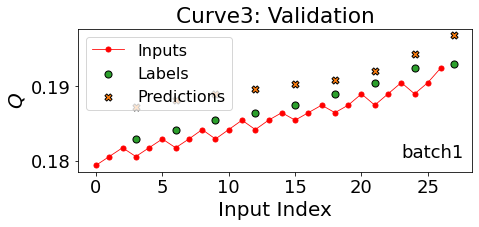

In [209]:
#batch_plot(curv0 =  [train_df_19, val_df_19, '1'], model=conv_model, window_t=conv_window_t )
batch_plot(curv =  ([train_df_09, val_df_09, '0'],  [train_df_19, val_df_19, '1']
                 ,[train_df_29, val_df_29, '2'],  [train_df_19, val_df_19, '3']   ), model=conv_model, window_t=conv_window_t)

#batch_plot(curv = None, model=conv_model, window_t=conv_window_t)

### all batch


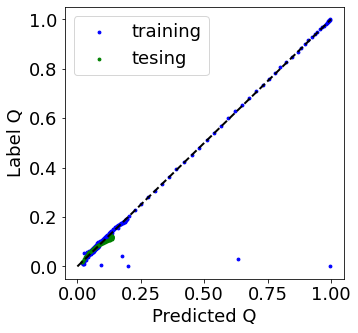

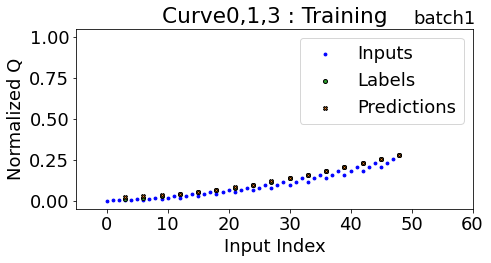

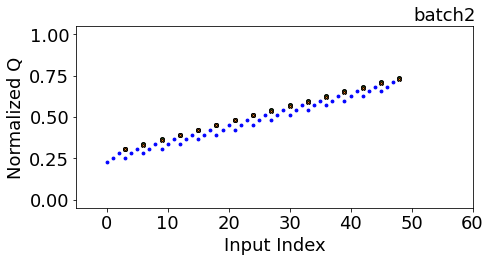

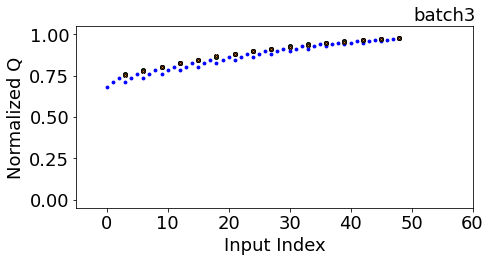

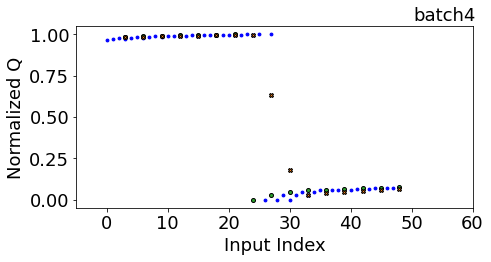

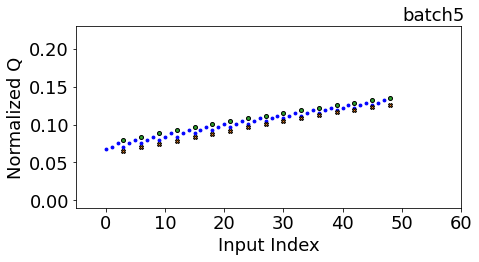

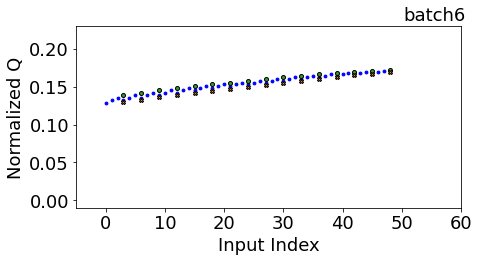

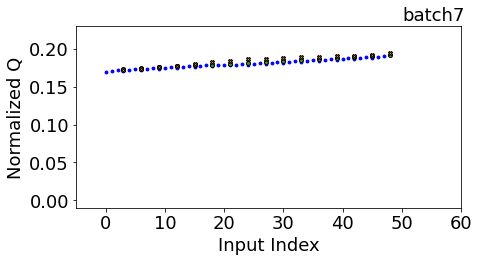

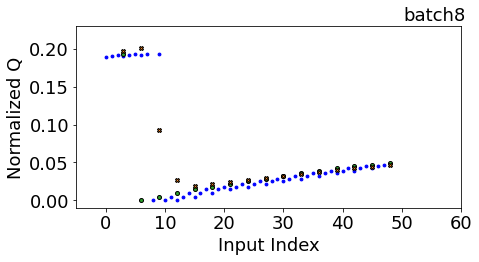

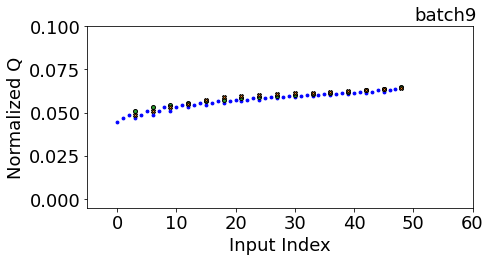

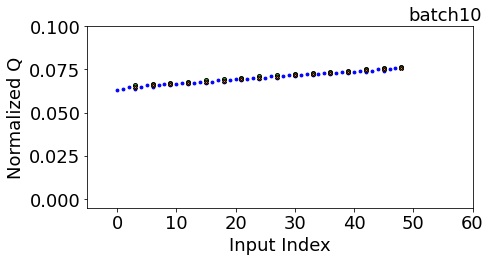

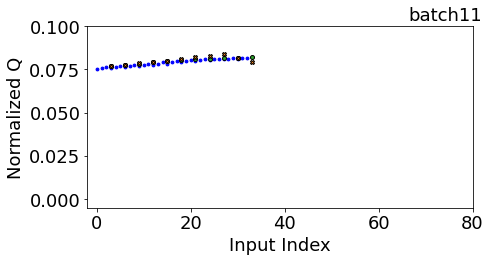

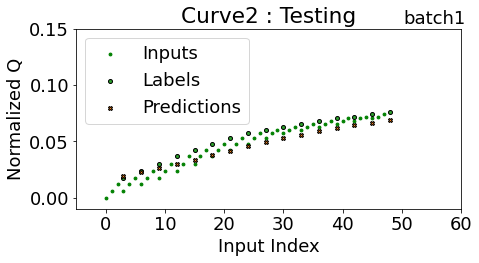

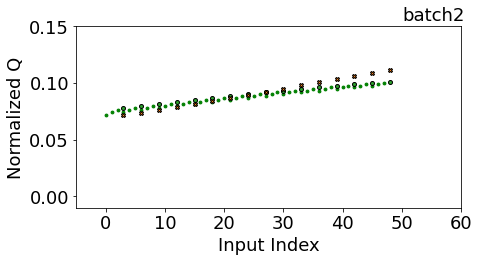

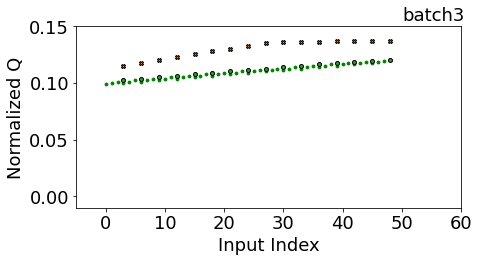

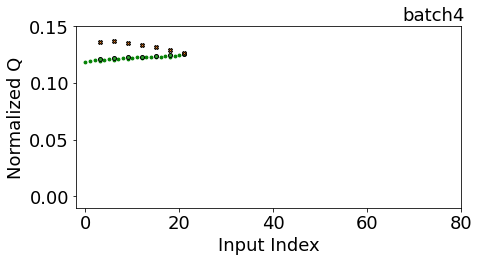

In [211]:
n = len(df)*0.5
crv_tr0 = df[0:int(n*0.50)].copy()
crv_tr1 = df[int(n*0.75):int(n)].copy()
crv_tr = pd.concat([crv_tr0, crv_tr1])
crv_va = df[int(n*0.50):int(n*0.75)].copy()

window_t = conv_window_t
model = conv_model
n_batch = 30

window_t.train_df = crv_tr
window_t.val_df = crv_va

#window_t.plot_batch(model, dset_name='train', n_batch=10 )
#input_indices = np.arange(wide_window_t.total_window_size*16-16 )[slice(0, wide_window_t.total_window_size*16 -1, None)]
#label_indices = np.arange(wide_window_t.total_window_size*16-15 )[slice(1, None, None)]

input_width = 3
shift = 1
label_width = 1
total_window_size = input_width + shift

#
pre_t = np.array([])
lab_t = np.array([])
pre_v = np.array([])
lab_v = np.array([])
#fig, ax5 = plt.subplots(figsize =(5,3))
#ax5.margins(0.01)
fig1, ax3 = plt.subplots(figsize =(5,5))

markers = ["X","o", "s", "D", "h"]
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

data = [window_t.train, window_t.val]
for j, dataset in enumerate(data) :
      i1=0
      for i, batch in enumerate(dataset) :
            fig2, ax5 = plt.subplots(figsize =(7,4))
            inputs, labels, lab = batch
            input_slice = slice(0, input_width*len(inputs))
            input_indices = np.arange(total_window_size*len(inputs))[input_slice]
            label_start = total_window_size - label_width
            labels_slice = slice(label_start, input_width*len(inputs)+1, 3)
            label_indices = np.arange(total_window_size*len(inputs))[labels_slice]

            predictions = model(inputs)

            in3 = np.array(inputs, dtype=np.float32)
            #in3 = tf.convert_to_tensor(data, dtype=tf.float32)
            in3 = in3.reshape(3*len(inputs),5)
            in3 = tf.convert_to_tensor(in3, dtype=tf.float32)

            la3 = np.array(labels, dtype=np.float32)
            la3 = la3.reshape(1*len(inputs),1)
            la3 = tf.convert_to_tensor(la3, dtype=tf.float32)

            pr3 = np.array(predictions, dtype=np.float32)
            pr3 = pr3.reshape(1*len(inputs),1)
            pr3 = tf.convert_to_tensor(pr3, dtype=tf.float32)

          #  ax5.scatter(input_indices, inputs[:, :, 1],label='Inputs', marker='.',
            if j == 0:
                ax5.scatter(input_indices[:], in3[:,1],label='Inputs', marker='.',
                            color=colors[j], zorder=-10 , s=32)
            if j == 1:
                ax5.scatter(input_indices[:], in3[:,1],label='Inputs', marker='.',
                                    color=colors[2], zorder=-10 , s=32)

            ax5.scatter(label_indices[:], la3[:],label='Labels', marker='o',
                    edgecolors='k', c='#2ca02c', s=16)
            #ax5.scatter(label_indices,   predictions[:, :, 0], label='Predictions',
            ax5.scatter(label_indices[:],   pr3[:], label='Predictions',
                          marker='X',  edgecolors='k', c='#ff7f0e', s=16)
            if j == 0 :
                ax3.scatter(predictions[:,0, 0], labels[:, 0, 0],
                        marker='.',color=colors[j], s=32)
                pre_t = np.append(pre_t, predictions[:, 0, 0])
                lab_t = np.append(lab_t, labels[:, 0, 0])
            if j == 1 :
                ax3.scatter(predictions[:, 0, 0], labels[:, 0, 0],
                        marker='.',color=colors[2], s=32)
                pre_v = np.append(pre_v, predictions[:, 0, 0])
                lab_v = np.append(lab_v, labels[:, 0, 0])

            if j==0 and i==0 :
                ax3.scatter(predictions[0, 0, 0], labels[0, 0, 0],label='training',
                        marker='.',color=colors[j], s=32)
                pre_t = np.append(pre_t, np.ravel(predictions[0, 0, 0]))
                lab_t = np.append(lab_t, np.ravel(labels[0, 0, 0]))

            if j==1 and i==0 :
                ax3.scatter(predictions[0, 0, 0], labels[0, 0, 0],label='tesing',
                        marker='.',color=colors[2], s=32)
                pre_v = np.append(pre_v, np.ravel(predictions[0, 0, 0]))
                lab_v = np.append(lab_v, np.ravel(labels[0, 0, 0]))

            if i == 0:
                ax5.legend()
            if i < 4 and j==0 :
                ax5.set_ylim(-0.05,1.05)
                ax5.text(0.93, 1.03 ,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)
            if 3 < i < 8 and j==0 :
                ax5.set_ylim(-0.01,0.23)
                ax5.text(0.93, 1.03,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)
            if i >= 8 and j==0  :
                ax5.set_ylim(-0.005,0.10)
                ax5.text(0.93, 1.03,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)
            if j==1  :
                ax5.set_ylim(-0.01,0.15)
                ax5.text(0.93, 1.03,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)

            if j==0 and i1==0 :
                ax3.legend()
            if j==1 and i==0:
                ax3.legend()
            i1 = i+1
            if i==0 and j==0 : ax5.set_title('Curve0,1,3 : Training')
            if i==0 and j==1 : ax5.set_title('Curve2 : Testing')
            ax5.set_xlabel('Input Index')
            ax5.set_ylabel('Normalized Q')
            ax5.set_xlim(-5,60)
            if i == len(list(dataset))-1 : ax5.set_xlim(-2,80)

            plt.gcf().tight_layout()

            fig2.savefig("figures/tot"+str(j)+str(i)+".png", dpi=300)

            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue

            #ax3.legend([],['train', 'val'])
#ax3.legend()

ax3.plot([0, 1], [0, 1], 'k--') # dashed diagonal
#ax5.invert_xaxis()
ax3.set_xlabel('Predicted Q')
ax3.set_ylabel('Label Q')
#ax3.set_ylim(0,1.1)
#ax3.set_xlim(0,1.1)

#ax3.margins(0.02, 0.02)

#subplot_title = ('Test')
#plt.gca().set_title(subplot_title)
# save figure
fig1.savefig("fig_con_03/txy.png", dpi=300)



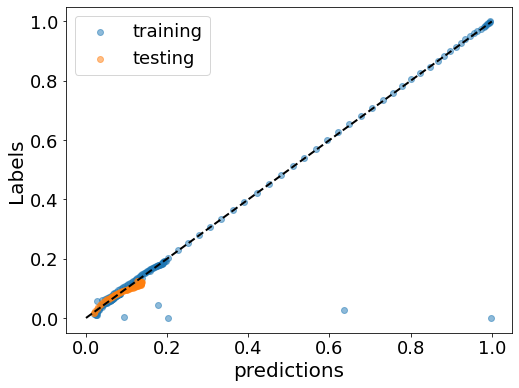

In [213]:
plt.scatter(pre_t, lab_t, alpha=0.5, label='training')
plt.scatter(pre_v, lab_v, alpha=0.5, label='testing')
plt.xlabel('predictions', fontsize=20)
plt.ylabel('Labels', fontsize=20)
fig1.savefig("figures/txy_2.png", dpi=300)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.legend()

Coefficients: 
 [[0.94328406]]
Mean squared error: 3.09e-04
Coefficient of determination: 0.995905


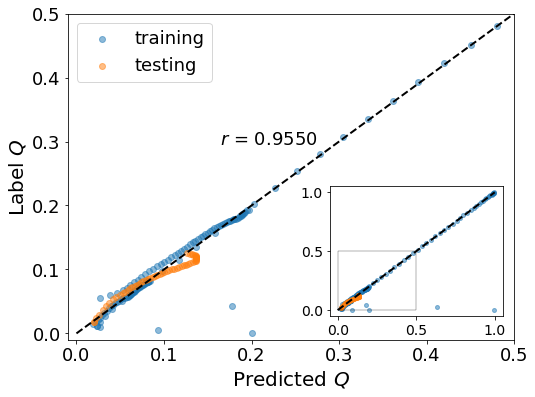

In [220]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.patches as patches

fig = plt.figure()

# Create linear regression object
regr = linear_model.LinearRegression()

pre_all2 = pre_t.reshape(-1, 1)
lab_all2 = lab_t.reshape(-1,1)
pre_all3 = pre_v.reshape(-1, 1)
lab_all3 = lab_v.reshape(-1,1)

pre_all = np.append(pre_t,pre_v)
lab_all = np.append(lab_t,lab_v)
pre_all = pre_all.reshape(-1, 1)
lab_all = lab_all.reshape(-1,1)



# Train the model using the training sets
regr.fit(pre_all, lab_all)

# Make predictions using the testing set
pre_pre_all = regr.predict(pre_all)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2e'
      % mean_squared_error(pre_all, pre_pre_all))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.6f'
      % r2_score(pre_all, pre_pre_all))

# Plot outputs
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.58, 0.18, 0.3, 0.3])

ax1.scatter(pre_all2, lab_all2,   alpha=0.5, label='training')
ax1.scatter(pre_all3, lab_all3,   alpha=0.5, label='testing')
#ax1.plot(pre_all2, pre_pre_all2, color='blue', linewidth=3)

ax1.set_xlabel('Predicted $Q$', fontsize=20)
ax1.set_ylabel('Label $Q$', fontsize=20)
ax1.plot([0, 1], [0, 1], 'k--') # dashed diagonal
ax1.text(0.45, 0.6 ,  "$r$ = 0.9550", fontsize=18 , ha="center", transform=ax1.transAxes)

#plt.xticks(())
#plt.yticks(())

ax2.scatter(pre_all2, lab_all2,  alpha=0.5, s=16)
ax2.scatter(pre_all3, lab_all3,  alpha=0.5, s=16)
#ax2.plot(pre_all2, pre_pre_all2, color='blue', linewidth=2)
ax2.tick_params(labelsize=14)

#ax2.set_xlabel('predictions')
#ax2.set_ylabel('labels')
ax2.plot([0, 1], [0, 1], 'k--') # dashed diagonal
ax2.add_patch(
     patches.Rectangle(
        (0, 0),
        0.5,
        0.5,
        linewidth=0.3,
        edgecolor = 'k',
        facecolor = 'yellow',
        fill=False #, alpha=0.6
     ) )




ax1.set_xlim(-0.01,0.5)
ax1.set_ylim(-0.01,0.5)


lines = []
labels = []
for ax in fig.axes:
	Line, Label = ax.get_legend_handles_labels()
	# print(Label)
	lines.extend(Line)
	labels.extend(Label)

ax1.legend(lines, labels, loc='upper left')

#ax2.tight_layout()


#plt.gcf().savefig("figures/txy_reg.png", dpi=300)
fig.savefig("fig_con_03/txy_reg.png", dpi=300)

In [221]:
cov = (np.sum(pre_t*lab_t)-len(pre_t)*np.mean(pre_t)
       *np.mean(lab_t))/len(pre_t)
print(cov)

0.0874193001892935


In [222]:
np.cov(pre_t, lab_t)[0,1]

0.08793052416700864

In [223]:
corr = cov/(np.std(pre_t)*np.std(lab_t))
corr


0.9549923096526522

In [87]:
# Predict Any Curve

#### read Good data

In [224]:
df3 = pd.read_csv(
    #os.path.join(mglearn.datasets.DATA_PATH, "anycurve3.csv") )
    os.path.join(mglearn.datasets.DATA_PATH, "constant(del).csv") )

df3 = df3[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
df3['delIF'] = df3['delFlow']/df3['delIR']*-1

df3['delIF']=df3['delIF'].replace(np.nan, 0)
df3 = df3[['IR', 'FlowHt', 'Sand','Ash', 'delIR' ]]

display(df3.head())

IR  FlowHt  Sand   Ash  delIR
0 1.000   0.000 0.400 0.600  0.000
1 1.000   0.380 0.400 0.600 -0.001
2 0.999   0.960 0.400 0.600 -0.001
3 0.997   1.540 0.400 0.600 -0.002
4 0.995   2.020 0.400 0.600 -0.002

IR  FlowHt    Sand     Ash   delIR
count 232.000 232.000 232.000 232.000 232.000
mean   -0.000  -0.000  -0.000   0.000  -0.000
std     1.000   1.000   1.000   1.000   1.000
min    -2.174  -0.789  -1.369  -1.369  -1.699
25%    -0.767  -0.520  -0.599  -0.599  -0.864
50%     0.279  -0.379  -0.000   0.000  -0.000
75%     0.907  -0.146   0.599   0.599   0.864
max     1.115   2.981   1.369   1.369   1.699

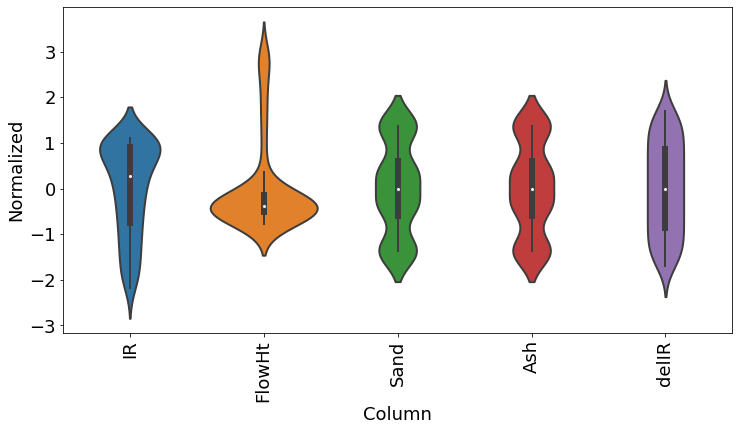

In [225]:
df3_mean = df3.mean()
df3_std = df3.std()
df3_std_s = (df3 - df3_mean) / df3_std
df3_std_m = df3_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df3_std_m)
_ = ax.set_xticklabels(df3.keys(), rotation=90)
df3_std_s.describe()


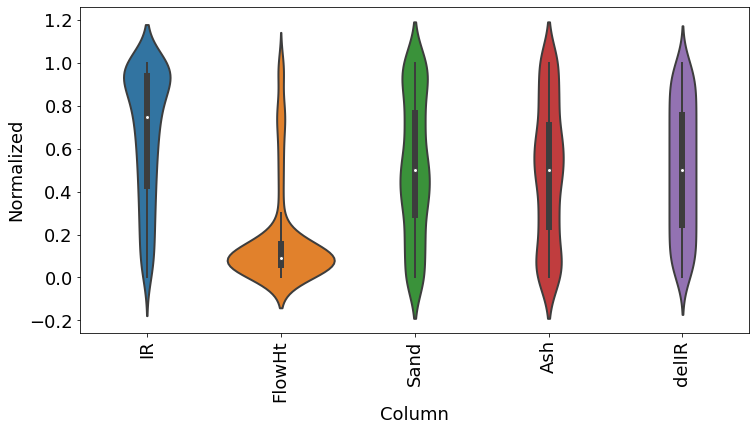

In [226]:
df3_min = df3.min()
df3_max = df3.max()
df3_std_01 = (df3 - df_min) / (df3_max-df3_min)
df3_std_m01 = df3_std_01.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std_m01)
_ = ax.set_xticklabels(df.keys(), rotation=90)
df3_std_s.describe()
plt.show()

In [227]:
conv_model = tf.keras.models.load_model("conv_03/r19")


#### predict vs.input 'as is'

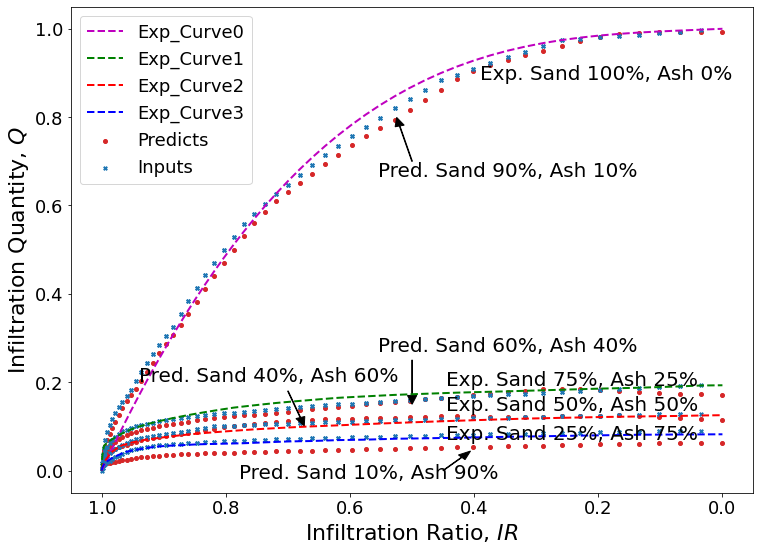

In [270]:
df3 = df3_std_01

colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

df3_org = df3

n = len(df3)
c_21 = df3[0:int(n*0.25)].copy()
c_11 = df3[int(n*0.25):int(n*0.5)].copy()
c_31 = df3[int(n*0.5):int(n*0.75)].copy()
c_01 = df3[int(n*0.75):int(n)].copy()

fig, ax2 = plt.subplots(figsize=(11,8))
data_set = [c_01, c_11, c_21, c_31 ]
#data_set = [c_31 ]

for j, data in enumerate(data_set) :
    conv_window_t.train_df = data
    ds = conv_window_t.train
    for i, batch in enumerate(ds) :
        inputs, targets, lab = batch
        predictions = conv_model(inputs)
        ax2.scatter(lab[:,0,0], predictions[:,0,0], marker='.', color='tab:red',
                    s=64,  zorder=-1 )
        if i==0:
            ax2.scatter(lab[0,0,0], predictions[0,0,0], marker='.', color='tab:red',
                      s=64,  zorder=-1  )
        if i==0 and j==0 :
            ax2.scatter(lab[0,0,0], predictions[0,0,0], marker='.', color='tab:red',
                    label='Predicts', s=64,  zorder=-1  )

        ax2.scatter(inputs[:, 1:, 0], inputs[:, 1:, 1], color='tab:blue',
                    marker='x', s=12)
        #if i ==0 :
        #    ax2.scatter(inputs[0,0:3,0], inputs[0,0:3,1], marker='x', color='tab:blue',
        #             s=12)
        if i ==0 and j==0 :
            ax2.scatter(inputs[0,0,0], inputs[0,0,1], marker='x', color='tab:blue',
                     label='Inputs', s=12)
#ax2.plot(c_01.iloc[0:58,0], c_01.iloc[0:58,1], 'm-', label='Curve0')
#ax2.plot(c_11.iloc[0:58,0], c_11.iloc[0:58,1], 'g-', label='Curve1')
#ax2.plot(c_21.iloc[0:58,0], c_21.iloc[0:58,1], 'r-', label='Curve2')
#ax2.plot(c_31.iloc[0:58,0], c_31.iloc[0:58,1], 'b-', label='Curve3')
# --- experiment-------
ax2.plot(curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm--',  label='Exp_Curve0')
ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g--',  label='Exp_Curve1')
ax2.plot(curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r--',  label='Exp_Curve2')
ax2.plot(curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b--',  label='Exp_Curve3')

ax2.legend(fontsize=18)

ax2.text(0.6, 0.85,  "Exp. Sand 100%, Ash 0%", fontsize=20,transform=ax2.transAxes)

ax2.text(0.45, 0.65,  "Pred. Sand 90%, Ash 10%",fontsize=20, transform=ax2.transAxes)
ax2.arrow(0.5, 0.7, 0.02, 0.08, head_width=0.015, head_length=0.02, fc='k', ec='k')

ax2.text(0.55, 0.22,  "Exp. Sand 75%, Ash 25%", fontsize=20,transform=ax2.transAxes)
ax2.text(0.55, 0.17,  "Exp. Sand 50%, Ash 50%", fontsize=20,transform=ax2.transAxes)
ax2.text(0.55, 0.11,  "Exp. Sand 25%, Ash 75%",fontsize=20, transform=ax2.transAxes)

ax2.text(0.45, 0.29,  "Pred. Sand 60%, Ash 40%",fontsize=20, transform=ax2.transAxes)
ax2.arrow(0.5, 0.25, -0.0, -0.08, head_width=0.015, head_length=0.02, fc='k', ec='k')

ax2.text(0.10, 0.23,  "Pred. Sand 40%, Ash 60%", fontsize=20,transform=ax2.transAxes)
ax2.arrow(0.7, 0.18, -0.02, -0.06, head_width=0.015, head_length=0.02, fc='k', ec='k')

ax2.text(0.247, 0.03,  "Pred. Sand 10%, Ash 90%", fontsize=20,transform=ax2.transAxes)
ax2.arrow(0.45, 0, -0.03, 0.03, head_width=0.015, head_length=0.02, fc='k', ec='k')



ax2.invert_xaxis()
ax2.set_xlabel('Infiltration Ratio, $IR$', fontsize=22)
ax2.set_ylabel('Infiltration Quantity, $Q$', fontsize=22)

plt.gcf().tight_layout()

fig.savefig("fig_con_03//other_guess.png", dpi=300)

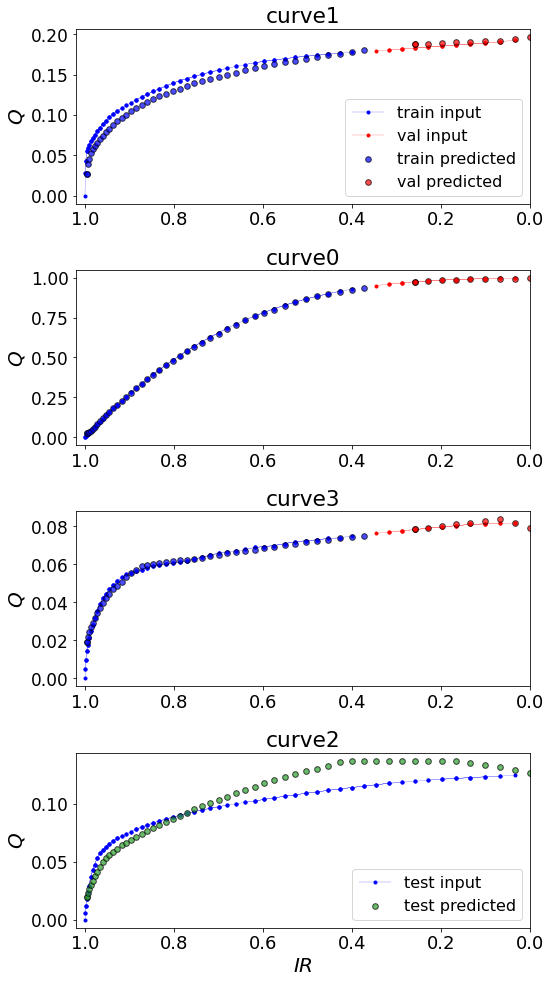

In [230]:
train_df_00 = c_01
train_df_10 = c_11
train_df_20 = c_21
train_df_30 = c_31

plot_val_con(conv_model, conv_window_t)

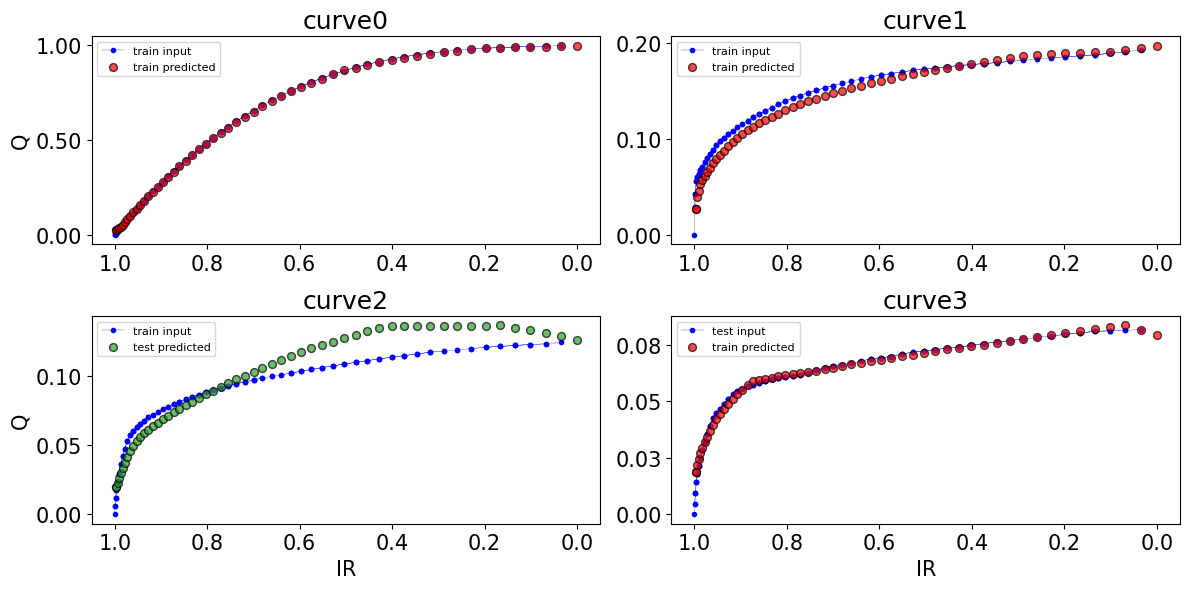

In [108]:
plot_val3_con(conv_model, conv_window_t)


